#### Initailization

In [2]:
desc = {
    "total_wirelength": "The total length of all routed wires in the design, which is a key indicator of routing complexity and congestion.",
    "number_vias": "The total number of vias in the layout, which represent connections between different metal layers.",
    "number_of_multi_cut_vias": "The number of vias that use multiple cuts for enhanced reliability and lower resistance.",
    "number_of_single_cut_vias": "The number of vias that use a single cut, which are more susceptible to manufacturing defects but occupy less space.",
    "max_overcon": "The maximum congestion value observed in any global routing cell, indicating the worst-case routing bottleneck.",
    "total_overcon": "The sum of all routing congestion values across the entire layout, representing overall congestion severity.",
    "worst_layer_gcell_overcon_rate": "The highest over-congestion rate observed in any layer for a global routing cell, indicating the most problematic metal layer in terms of congestion."
}

In [3]:
feat_pool = desc

In [4]:
new_feat_pool = {}

In [5]:
total_feat_mse = [
    {"total_wirelength": 0.5},
    {"number_vias": 0.5},
    {"number_of_multi_cut_vias": 0.5},
    {"number_of_single_cut_vias": 0.5},
    {"max_overcon": 0.5},
    {"total_overcon": 0.5},
    {"worst_layer_gcell_overcon_rate": 0.5}
]

In [6]:
initial_pool = list(desc.keys())

In [7]:
import cv2
import numpy as np
import re

def total_wirelength(logging_file_string):
    matches = re.findall(r"Total wire length =\s*([\d.]+)", logging_file_string)
    if matches:
        ans = float(matches[-1])
    else:
        ans = 0
        
    return {"total_wirelength": ans}
    
def number_vias(logging_file_string):
    matches = re.findall(r"Total number of vias =\s*([\d.]+)", logging_file_string)
    if matches:
        ans = float(matches[-1])
    else:
        ans = 0
        
    return {"number_vias": ans}
    
def number_of_multi_cut_vias(logging_file_string):
    matches = re.findall(r"Total number of multi-cut vias =\s*([\d.]+)", logging_file_string)
    if matches:
        ans = float(matches[-1])
    else:
        ans = 0
        
    return {"number_of_multi_cut_vias": ans}
    
def number_of_single_cut_vias(logging_file_string):
    matches = re.findall(r"Total number of single cut vias =\s*([\d.]+)", logging_file_string)
    if matches:
        ans = float(matches[-1])
    else:
        ans = 0
        
    return {"number_of_single_cut_vias": ans}
    
def max_overcon(logging_file_string):
    matches = re.findall(r"Max overcon =\s*([\d.]+)", logging_file_string)
    if matches:
        ans = float(matches[-1])
    else:
        ans = 0
        
    return {"max_overcon": ans}
    
def total_overcon(logging_file_string):
    matches = re.findall(r"Total overcon =\s*([\d.]+)", logging_file_string)
    if matches:
        ans = float(matches[-1])
    else:
        ans = 0
        
    return {"total_overcon": ans}
    
def worst_layer_gcell_overcon_rate(logging_file_string):
    matches = re.findall(r"Worst layer Gcell overcon rate =\s*([\d.]+)", logging_file_string)
    if matches:
        ans = float(matches[-1])
    else:
        ans = 0
        
    return {"worst_layer_gcell_overcon_rate": ans}

In [8]:
with open("/data2/NVIDIA/CircuitNet-N28/Dataset/logs/1-RISCY-a-1-c2-u0.7-m1-p1-f0", "r") as f:
    logging_file_string = f.read()

In [9]:
feat_func_list = [
    total_wirelength,
    number_vias,
    number_of_multi_cut_vias,
    number_of_single_cut_vias,
    max_overcon,
    total_overcon,
    worst_layer_gcell_overcon_rate
]

In [10]:
train_design = ["RISCY-a", "RISCY-b", "RISCY-FPU-a", "RISCY-FPU-b"]
test_design_a = ["zero-riscy-a"]
test_design_b = ["zero-riscy-b"]

In [ ]:
api_key = "sk-your_api_key_here"

def encode_image(features):
    features_b64 = []
    for image in features:
        buff = BytesIO()
        image.save(buff, format="PNG")
        buff.seek(0)
        image_b64 = base64.b64encode(buff.read()).decode()
        features_b64.append(image_b64)
    return features_b64

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

In [12]:
import models
device = "cuda:4"
opt = {'task': 'congestion_gpdl', 'save_path': 'work_dir/congestion_gpdl/', 'pretrained': '/home/felixchaotw/CircuitNet/model/congestion.pth', 'max_iters': 200000, 'plot_roc': False, 'arg_file': None, 'cpu': False, 'dataroot': '../../training_set/congestion', 'ann_file_train': './files/train_N28.csv', 'ann_file_test': './files/test_N28.csv', 'dataset_type': 'CongestionDataset', 'batch_size': 16, 'aug_pipeline': ['Flip'], 'model_type': 'GPDL', 'in_channels': 3, 'out_channels': 1, 'lr': 0.0002, 'weight_decay': 0, 'loss_type': 'MSELoss', 'eval_metric': ['NRMS', 'SSIM', 'EMD'], 'ann_file': './files/test_N28.csv', 'test_mode': True}
model = models.__dict__["GPDL"](**opt)
model.init_weights(**opt)
model.to(device)

/home/felixchaotw/mllm-physical-design/feat_extract/models/gpdl.py:163: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weight = torch.load(pretrained, map_location='cpu')['st

GPDL(
  (encoder): Encoder(
    (c1): conv(
      (main): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (5): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (c2): conv(
      (main): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (

In [13]:
import warnings
warnings.filterwarnings("ignore")

#### Preprocessing

In [14]:
import numpy as np
from PIL import Image
import requests, base64
import json
import argparse
from io import BytesIO
import cv2
import heapq

tile_size = 16
image_size = 256


def get_tiles_congestion(image_array):
    tiles = []
    for x in range(0, image_size, tile_size):
        for y in range(0, image_size, tile_size):
            tile = image_array[x:x+tile_size, y:y+tile_size]
            tiles.append(np.mean(tile))
            
    tiles = heapq.nlargest(20, tiles)
    return tiles

file_path = '/data2/NVIDIA/CircuitNet-N28/Dataset/congestion/feature/RISCY-a/165-RISCY-a-1-c2-u0.75-m2-p6-f1.npy'
label_path = '/data2/NVIDIA/CircuitNet-N28/Dataset/congestion/label/RISCY-a/165-RISCY-a-1-c2-u0.75-m2-p6-f1.npy'
numpy_image = np.load(file_path)
label_image = np.load(label_path).squeeze()
batch_image = numpy_image.transpose(2,0,1)
image_features = []
image_inferences = []

for i, image in enumerate(batch_image):
    image_features.append(image)
    image_inferences.append(Image.fromarray(np.uint8(image * 255)))
    
tiles = get_tiles_congestion(label_image)
image_inferences.append(Image.fromarray(np.uint8(label_image * 255)))
print(np.mean(tiles))

0.13181345241170517


In [15]:
def get_all_features(logging_file_path):
    with open(logging_file_path, "r") as f:
        logging_file_string = f.read()
            
    final_features = {}
    
    for feat_func in feat_func_list:
        feat = feat_func(logging_file_string)
        final_features.update(feat)
        
    return final_features

In [16]:
from tqdm import tqdm
import os
import torch

def get_gpdl_prediction(design):
     feature_path = f"/data2/NVIDIA/CircuitNet-N28/Dataset/congestion/feature/{design}/" 
     label_path = f"/data2/NVIDIA/CircuitNet-N28/Dataset/congestion/label/{design}/"
     gpdl_prediction = {}
     
     for filename in tqdm(os.listdir(feature_path)):
          file_path = os.path.join(feature_path, filename)
          numpy_image = np.load(file_path)
          batch_image = numpy_image.transpose(2,0,1)
          with torch.no_grad():
               input_image = torch.tensor(batch_image).unsqueeze(0).float().to(device)
               output_image = model(input_image)
               prediction = np.mean(get_tiles_congestion(output_image.cpu().numpy().squeeze()))
          
          gpdl_prediction[filename] = prediction
          
     return gpdl_prediction

gpdl_prediction = {}
gpdl_prediction["RISCY-a"] = get_gpdl_prediction("RISCY-a")
gpdl_prediction["RISCY-b"] = get_gpdl_prediction("RISCY-b")
gpdl_prediction["RISCY-FPU-a"] = get_gpdl_prediction("RISCY-FPU-a")
gpdl_prediction["RISCY-FPU-b"] = get_gpdl_prediction("RISCY-FPU-b")
gpdl_prediction["zero-riscy-a"] = get_gpdl_prediction("zero-riscy-a")
gpdl_prediction["zero-riscy-b"] = get_gpdl_prediction("zero-riscy-b")

  0%|          | 0/2003 [00:00<?, ?it/s]

100%|██████████| 1122/1122 [00:41<00:00, 27.03it/s]


#### Fitness Scoring

In [437]:
get_all_features("/data2/NVIDIA/CircuitNet-N28/Dataset/logs/1-RISCY-a-1-c2-u0.7-m1-p1-f0")

{'total_wirelength': 1054059.0,
 'number_vias': 476046.0,
 'number_of_multi_cut_vias': 231.0,
 'number_of_single_cut_vias': 475815.0,
 'max_overcon': 12.0,
 'total_overcon': 5.71,
 'worst_layer_gcell_overcon_rate': 4.12,
 'hard_to_access_pins_ratio': 0.30141187759158355,
 'instance_blockages_count': 98567,
 'early_gr_overflow_percentage': 0.5,
 'horizontal_overflow_percentage': 0.0,
 'congestion_prediction_accuracy': -17.54081632653061,
 'initial_placement_efficiency': 0.052056220718375845,
 'area_based_congestion_density': 2.9325,
 'multi_layer_pin_access_variability': 43.59545037902464,
 'average_layer_congestion': 2.86375,
 'pin_density_variance_map': np.float64(34.055683984374994),
 'non_default_routing_rule_usage': 191,
 'crosstalk_sensitive_zones': 20,
 'inter_macro_channel_congestion': 49.78}

In [438]:
import pandas as pd
from tqdm.auto import tqdm
import os
import torch
import multiprocessing



def single_extractor(design):
        drop_empty_path = []
        feature_path = f"/data2/NVIDIA/CircuitNet-N28/Dataset/congestion/feature/{design}/" 
        label_path = f"/data2/NVIDIA/CircuitNet-N28/Dataset/congestion/label/{design}/"

        labels = []
        ids = []

        for filename in tqdm(os.listdir(label_path)):
            file_path = os.path.join(label_path, filename)
            label_image = np.load(file_path).squeeze()
            label = float(np.mean(get_tiles_congestion(label_image)))
            ids.append(filename)
            labels.append(label)
            
        df = pd.DataFrame({"id": ids,})
        df = df.astype('object')

        for filename in tqdm(os.listdir(feature_path)):
            file_path = os.path.join(feature_path, filename)
            numpy_image = np.load(file_path)
            batch_image = numpy_image.transpose(2,0,1)
            
            index = (df["id"] == filename)
            log_path = file_path.replace("congestion","logs").replace(f"/feature/{design}", "").replace(".npy", "")
            
            try:
                all_features = get_all_features(log_path)
            except:
                drop_empty_path.append(filename)
                continue
                
            for key, value in all_features.items():
                df.loc[index, key] = value
            
            df.loc[index, "prediction_gpdl"] = gpdl_prediction[design][filename]
        
        df['label'] = labels
        for path in drop_empty_path:
            df.drop(df.index[df['id'] == path], inplace = True)
        df.reset_index(drop=True, inplace=True)
        return df

def dataset_setting(designs):
    pool = multiprocessing.Pool()
    df_list = pool.map(single_extractor, designs)
    return pd.concat(df_list)

In [439]:
train_df = dataset_setting(train_design)
test_df_a = single_extractor(test_design_a[0])
test_df_b = single_extractor(test_design_b[0])

  0%|          | 0/2042 [00:00<?, ?it/s]

  0%|          | 0/2042 [00:00<?, ?it/s]

  0%|          | 0/1122 [00:00<?, ?it/s]

  0%|          | 0/1122 [00:00<?, ?it/s]

#### Extend Features

In [441]:
train_df = train_df[list(feat_pool.keys()) + ["id", "label", "prediction_gpdl"] + list(new_feat_pool.keys())]

KeyError: "['macro_density_variance', 'clock_tree_depth_distribution', 'routing_congestion_recovery_rate', 'vault_layer_separation_metric', 'layer_prioritization_effectiveness', 'padding_factor_optimization_effect', 'blockage_density_index', 'timing_criticality_heatmap', 'effective_channel_density'] not in index"

In [ ]:
test_df_a = test_df_a[list(feat_pool.keys()) + ["id", "label", "prediction_gpdl"] + list(new_feat_pool.keys())]
test_df_b = test_df_b[list(feat_pool.keys()) + ["id", "label", "prediction_gpdl"] + list(new_feat_pool.keys())]

#### Clear Inf

In [ ]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
test_df_a.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df_b.replace([np.inf, -np.inf], np.nan, inplace=True)

#### Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

new_feats = list(new_feat_pool.keys())
regressor = RandomForestRegressor(random_state=18, max_depth=10)
train_df, valid_df = train_test_split(train_df, test_size=0.1, random_state=18)

In [413]:
def train(single_feat):
    x = train_df.drop(columns=(["id", "label"] + [feat for feat in new_feats if feat != single_feat]))
    y = train_df["label"]
    regressor.fit(x, y)
    
def predict(single_feat):
    first = ["prediction"] if "prediction" in valid_df.columns else []
    x = valid_df.drop(columns=(["id", "label"] + [feat for feat in new_feats if feat != single_feat] + first))
    y_hat = regressor.predict(x)
    valid_df["prediction"] = y_hat
    
def mse_calc(single_feat):
    mse = root_mean_squared_error(valid_df["label"], valid_df["prediction"])
    return {single_feat: mse}
    
def train_total(new_feat="no"):
    x = train_df.drop(columns=(["id", "label"] + [feat for feat in new_feats if feat != new_feat]))
    y = train_df["label"]
    regressor.fit(x, y)
    
def predict_total(new_feat="no"):
    first = ["prediction"] if "prediction" in test_df_a.columns else []
    x_a = test_df_a.drop(columns=(["id", "label"] + [feat for feat in new_feats if feat != new_feat] + first))
    x_b = test_df_b.drop(columns=(["id", "label"] + [feat for feat in new_feats if feat != new_feat] + first))
    y_hat_a = regressor.predict(x_a)
    y_hat_b = regressor.predict(x_b)
    test_df_a["prediction"] = y_hat_a 
    test_df_b["prediction"] = y_hat_b

In [414]:
new_feat_mse = []

for single_feat in tqdm(new_feats):
    train(single_feat)
    predict(single_feat)
    mse = mse_calc(single_feat)
    new_feat_mse.append(mse)

  0%|          | 0/10 [00:00<?, ?it/s]

In [415]:
new_feat_mse = [sorted(new_feat_mse, key=lambda x: list(x.values())[0])[0]]

In [416]:
new_feat_mse

[{'inter_macro_channel_congestion': np.float64(0.03195344917062358)}]

In [417]:
train_total(new_feat=list(new_feat_mse[0].keys())[0])
predict_total(new_feat=list(new_feat_mse[0].keys())[0])

In [ ]:
from scipy import stats
from sklearn.metrics import ndcg_score
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use(['science','grid','retro'])

def replaceWithRank(arr):
    n = len(arr)
    res = [0] * n
    pq = []
    for i in range(n):
        heapq.heappush(pq, (arr[i], i))

    rank = 0
    lastNum = float('inf')

    while pq:
        curr, index = heapq.heappop(pq)

        if lastNum == float('inf') or curr != lastNum:
            rank += 1
            
        res[index] = rank
        lastNum = curr

    return res

def evalute_corr(congestion_set, predicted, corr_metrics):
    x = np.array(list(congestion_set.values()))[::40]
    x_label = list(congestion_set.keys())[::40]
    y = np.array([predicted[id] for id in x_label])
    results = {}
    if "PLCC" in corr_metrics:
        results["PLCC"] = stats.pearsonr(x, y)
    if "SRCC" in corr_metrics:
        results["SRCC"] = stats.spearmanr(x, y)
    if "KRCC" in corr_metrics:
        results["KRCC"] = stats.kendalltau(x, y)
    
    return results


def evalute_ndcg(congestion_set, predicted):
    congestion_set = dict(sorted(congestion_set.items(), key=lambda x: x[0]))
    x = np.array(list(congestion_set.values()))
    predicted = dict(sorted(predicted.items(), key=lambda x: x[0]))
    y = np.array(list(predicted.values()))
    return ndcg_score([x], [y])

def evaluate_design(df):
    congestion_set = dict(zip(df["id"], df["label"]))
    congestion_set = dict(sorted(congestion_set.items(), key=lambda x: x[1]))
    predicted = dict(zip(df["id"], df["prediction"]))
    corr_metrics = ["PLCC", "SRCC", "KRCC"]
    results = evalute_corr(congestion_set, predicted, corr_metrics)
    results["NDCG"] = evalute_ndcg(congestion_set, predicted)
    x = list(congestion_set.keys())[::40]
    x = [name.split("-")[0] for name in x]
    x_label = list(range(0,len(x)))
    y = [predicted[file_path] for file_path in congestion_set.keys()][::40]
    y_label = replaceWithRank(y)
    plt.figure(figsize=(10,5))
    plt.plot(x, y_label, linewidth="2", marker="o")
    plt.plot(x, x_label, linewidth="2", marker="o")
    plt.xticks(ticks=x_label, labels=x, rotation=90)
    plt.xlabel("Images")
    plt.ylabel("Rank Order")
    plt.title("GPDL + GARF_log")
    return results

#### Baseline

{'PLCC': PearsonRResult(statistic=np.float64(0.410243642670077), pvalue=np.float64(0.01596188349009406)),
 'SRCC': SignificanceResult(statistic=np.float64(0.38212375859434683), pvalue=np.float64(0.025733949921219974)),
 'KRCC': SignificanceResult(statistic=np.float64(0.25490196078431376), pvalue=np.float64(0.03401486782556621)),
 'NDCG': np.float64(0.9725370738927304)}

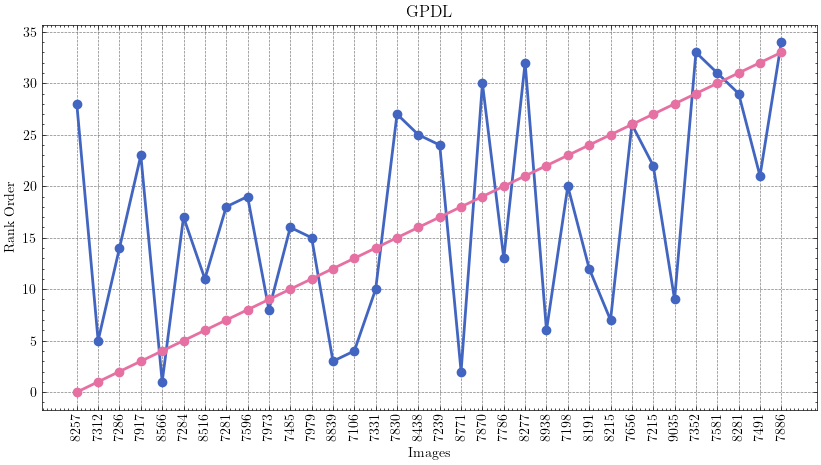

In [541]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.7100175038158323), pvalue=np.float64(1.602422294939706e-05)),
 'SRCC': SignificanceResult(statistic=np.float64(0.5669950738916255), pvalue=np.float64(0.0013404283937960937)),
 'KRCC': SignificanceResult(statistic=np.float64(0.4334975369458127), pvalue=np.float64(0.0007459576503116791)),
 'NDCG': np.float64(0.9718798065391582)}

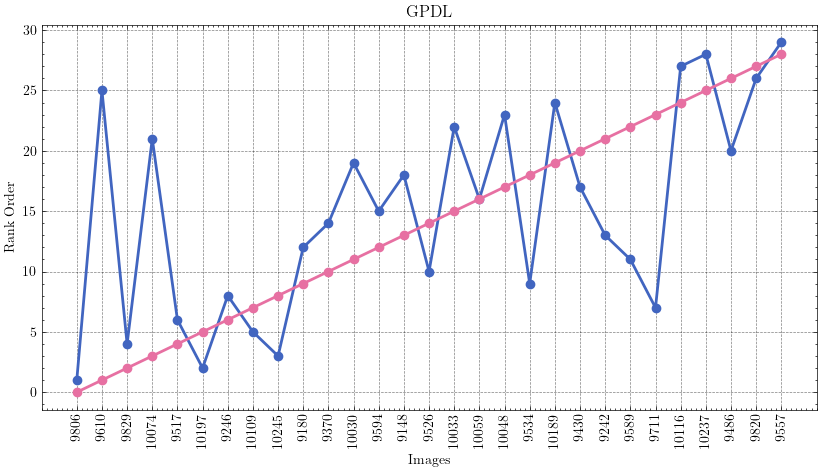

In [542]:
evaluate_design(test_df_b)

#### Stage 1.

{'PLCC': PearsonRResult(statistic=np.float64(0.31596470638316143), pvalue=np.float64(0.06869570173386068)),
 'SRCC': SignificanceResult(statistic=np.float64(0.44262796027501905), pvalue=np.float64(0.008757598705086956)),
 'KRCC': SignificanceResult(statistic=np.float64(0.31550802139037437), pvalue=np.float64(0.008692254877280606)),
 'NDCG': np.float64(0.9751476486421462)}

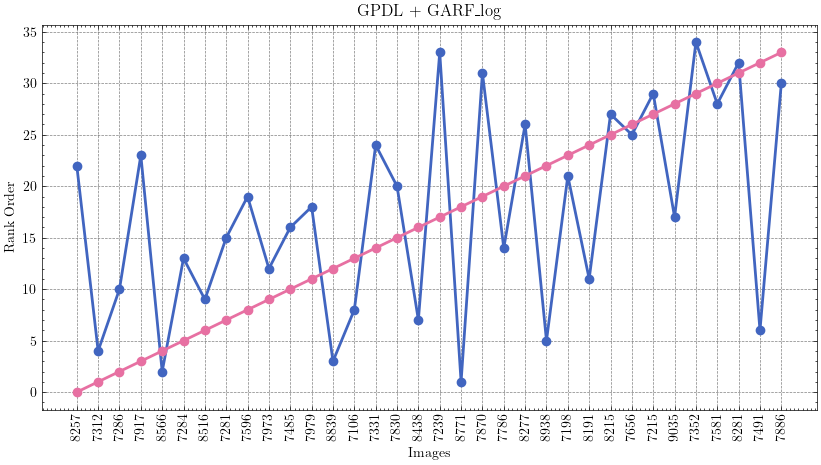

In [310]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.6183042160966546), pvalue=np.float64(0.0003506543653451615)),
 'SRCC': SignificanceResult(statistic=np.float64(0.5201970443349753), pvalue=np.float64(0.0038200508973926617)),
 'KRCC': SignificanceResult(statistic=np.float64(0.38423645320197036), pvalue=np.float64(0.0030586572531963864)),
 'NDCG': np.float64(0.9680054213983579)}

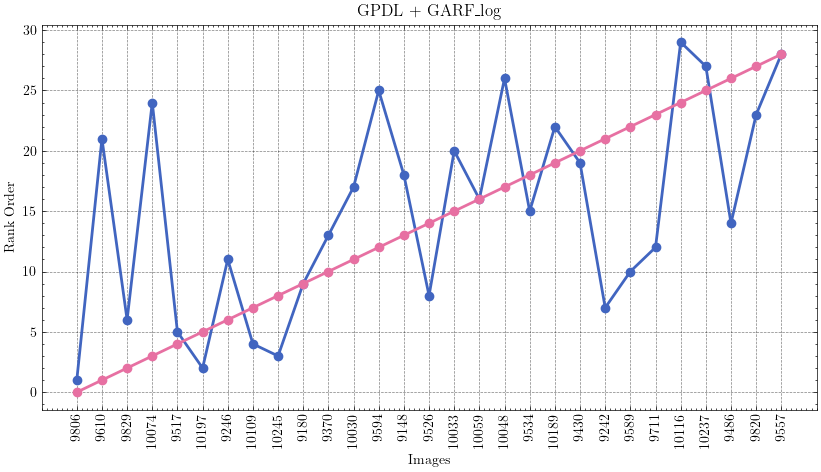

In [311]:
evaluate_design(test_df_b)

#### Stage 2.

{'PLCC': PearsonRResult(statistic=np.float64(0.4292389414601539), pvalue=np.float64(0.011301556942377881)),
 'SRCC': SignificanceResult(statistic=np.float64(0.5141329258976317), pvalue=np.float64(0.0018680036287967055)),
 'KRCC': SignificanceResult(statistic=np.float64(0.35472370766488415), pvalue=np.float64(0.003177078822819209)),
 'NDCG': np.float64(0.9741312494226428)}

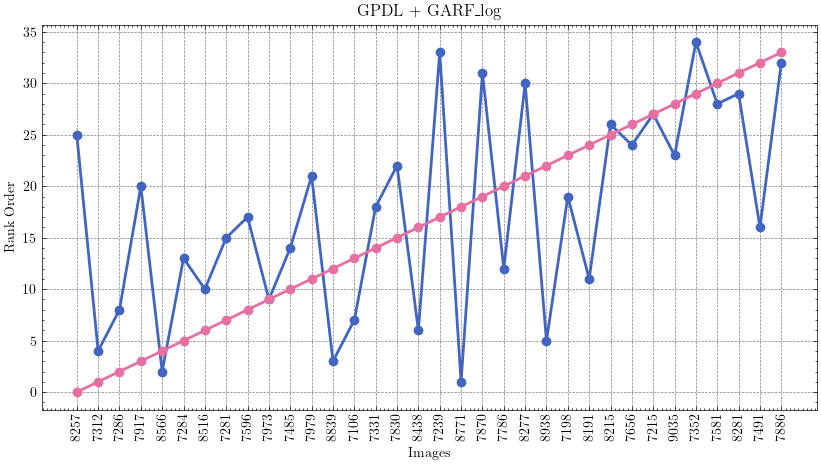

In [385]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.6149438249623449), pvalue=np.float64(0.0003855702920035106)),
 'SRCC': SignificanceResult(statistic=np.float64(0.5083743842364531), pvalue=np.float64(0.004865493696226967)),
 'KRCC': SignificanceResult(statistic=np.float64(0.37931034482758613), pvalue=np.float64(0.0034854220737451018)),
 'NDCG': np.float64(0.9670884053159907)}

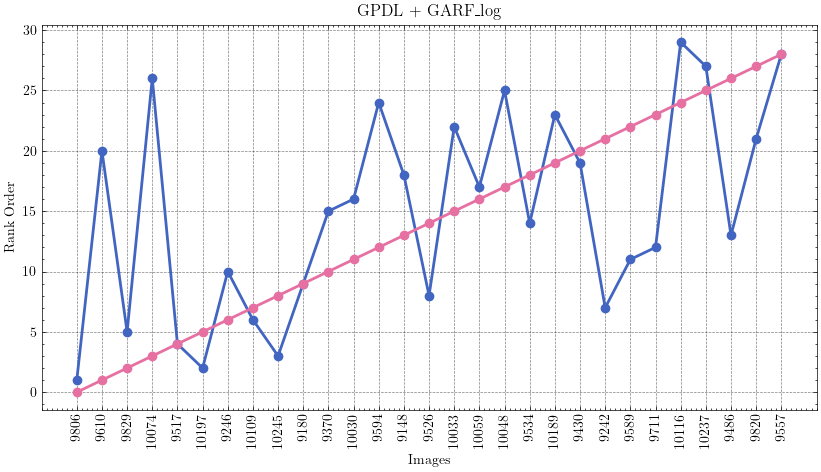

In [386]:
evaluate_design(test_df_b)

#### Stage 3.

{'PLCC': PearsonRResult(statistic=np.float64(0.3351145134130739), pvalue=np.float64(0.05269863529584584)),
 'SRCC': SignificanceResult(statistic=np.float64(0.4056531703590527), pvalue=np.float64(0.01730229287702143)),
 'KRCC': SignificanceResult(statistic=np.float64(0.2762923351158646), pvalue=np.float64(0.021573817362857652)),
 'NDCG': np.float64(0.9698879141449436)}

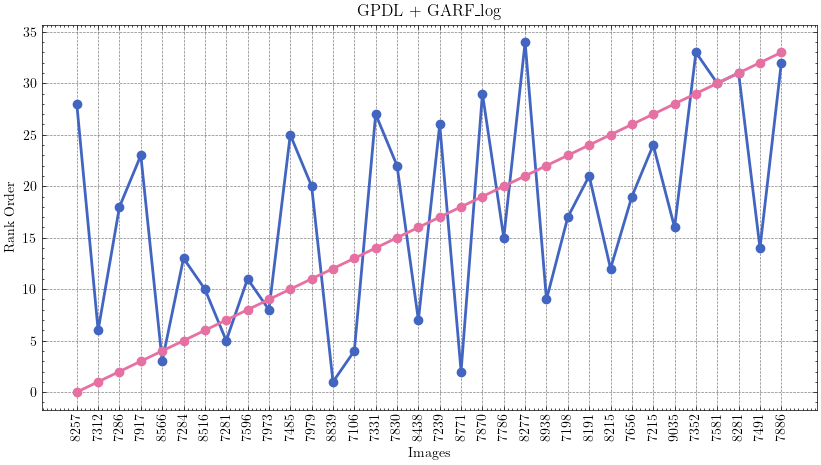

In [504]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.6064180166381401), pvalue=np.float64(0.0004882398497218622)),
 'SRCC': SignificanceResult(statistic=np.float64(0.47536945812807874), pvalue=np.float64(0.009156833188962715)),
 'KRCC': SignificanceResult(statistic=np.float64(0.36453201970443344), pvalue=np.float64(0.00510161852025979)),
 'NDCG': np.float64(0.9629129467257433)}

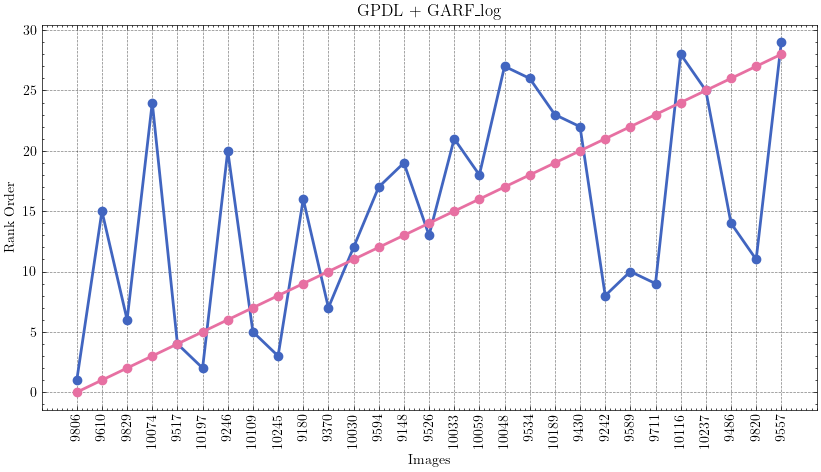

In [505]:
evaluate_design(test_df_b)

#### Stage 4.

{'PLCC': PearsonRResult(statistic=np.float64(0.34138597426264794), pvalue=np.float64(0.04815899639068836)),
 'SRCC': SignificanceResult(statistic=np.float64(0.38395721925133686), pvalue=np.float64(0.024974016050836507)),
 'KRCC': SignificanceResult(statistic=np.float64(0.24420677361853835), pvalue=np.float64(0.042260195248074485)),
 'NDCG': np.float64(0.9700115272368943)}

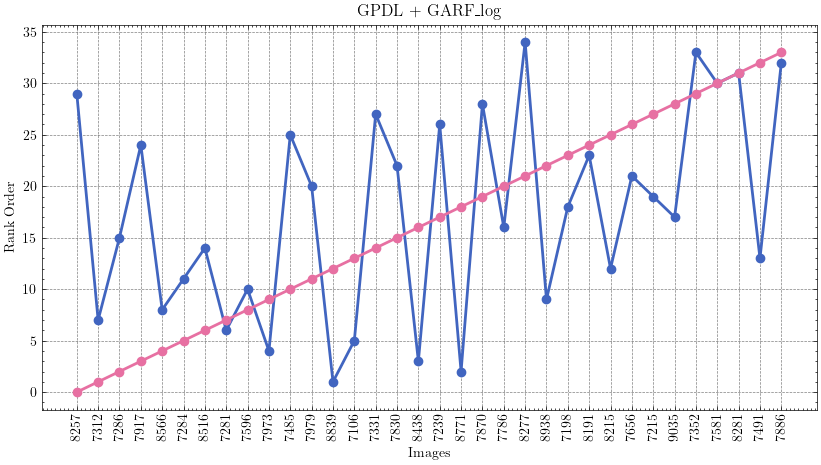

In [555]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.6161680292404852), pvalue=np.float64(0.00037251131020124757)),
 'SRCC': SignificanceResult(statistic=np.float64(0.45172413793103444), pvalue=np.float64(0.01389684897328752)),
 'KRCC': SignificanceResult(statistic=np.float64(0.3399014778325123), pvalue=np.float64(0.009294120204414674)),
 'NDCG': np.float64(0.9643713838327773)}

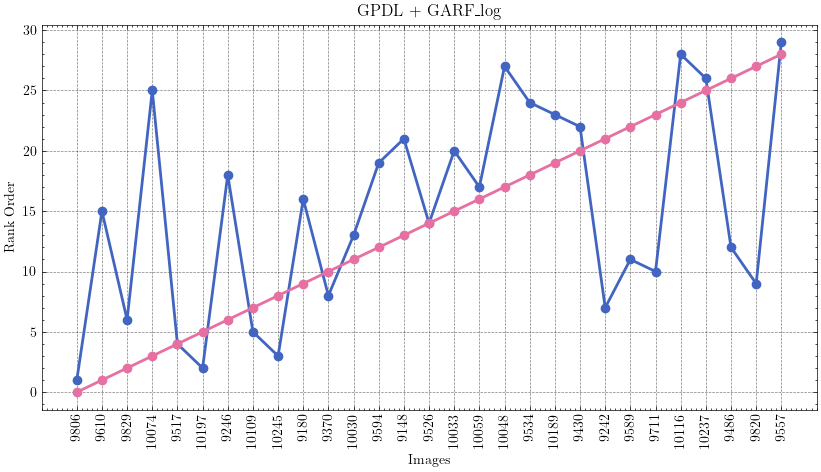

In [556]:
evaluate_design(test_df_b)

#### Stage 5.

{'PLCC': PearsonRResult(statistic=np.float64(0.32777694863858664), pvalue=np.float64(0.05843527110549126)),
 'SRCC': SignificanceResult(statistic=np.float64(0.37845683728036666), pvalue=np.float64(0.027310969527514536)),
 'KRCC': SignificanceResult(statistic=np.float64(0.24777183600713015), pvalue=np.float64(0.03934144382669546)),
 'NDCG': np.float64(0.9680266582864384)}

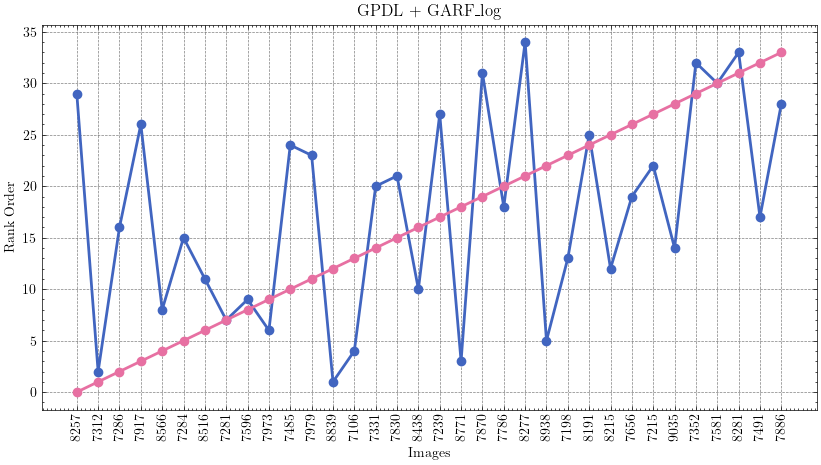

In [604]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.5964299815017242), pvalue=np.float64(0.0006384330848735483)),
 'SRCC': SignificanceResult(statistic=np.float64(0.43004926108374375), pvalue=np.float64(0.01988616638546154)),
 'KRCC': SignificanceResult(statistic=np.float64(0.3251231527093596), pvalue=np.float64(0.013052354736068039)),
 'NDCG': np.float64(0.9666704106201573)}

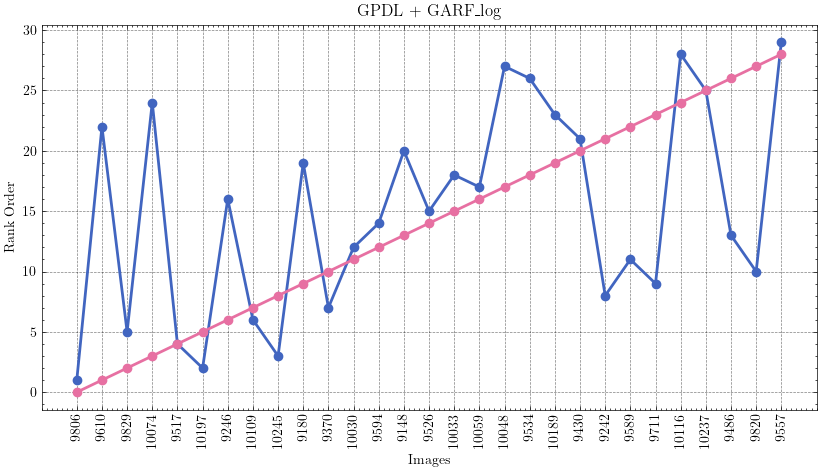

In [605]:
evaluate_design(test_df_b)

#### Stage 6

{'PLCC': PearsonRResult(statistic=np.float64(0.3626685471991432), pvalue=np.float64(0.03503369120375487)),
 'SRCC': SignificanceResult(statistic=np.float64(0.4300993124522536), pvalue=np.float64(0.011121152440244395)),
 'KRCC': SignificanceResult(statistic=np.float64(0.3012477718360072), pvalue=np.float64(0.012233687351360363)),
 'NDCG': np.float64(0.9718015202050152)}

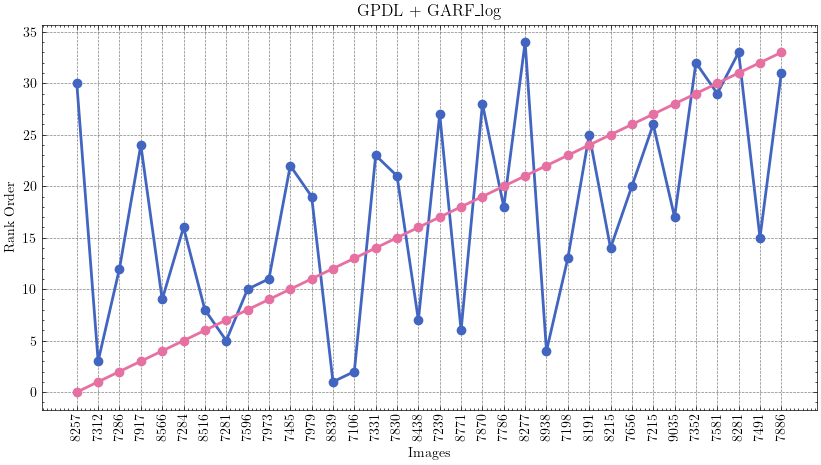

In [665]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.5944315624973601), pvalue=np.float64(0.0006729240913069021)),
 'SRCC': SignificanceResult(statistic=np.float64(0.4142857142857142), pvalue=np.float64(0.025460715099270042)),
 'KRCC': SignificanceResult(statistic=np.float64(0.3054187192118226), pvalue=np.float64(0.020064725792834706)),
 'NDCG': np.float64(0.9665991789552758)}

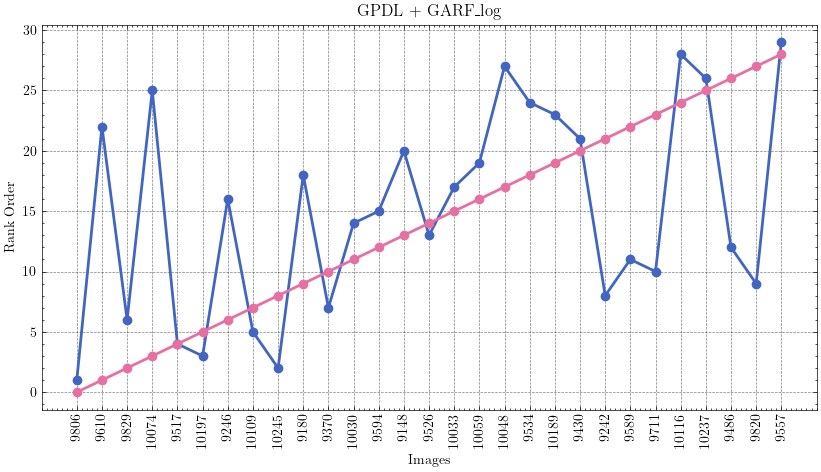

In [666]:
evaluate_design(test_df_b)

#### Stage 7

{'PLCC': PearsonRResult(statistic=np.float64(0.306184351400502), pvalue=np.float64(0.07821459737352593)),
 'SRCC': SignificanceResult(statistic=np.float64(0.35981665393430096), pvalue=np.float64(0.03660168502345693)),
 'KRCC': SignificanceResult(statistic=np.float64(0.24777183600713015), pvalue=np.float64(0.03934144382669546)),
 'NDCG': np.float64(0.9672332687412285)}

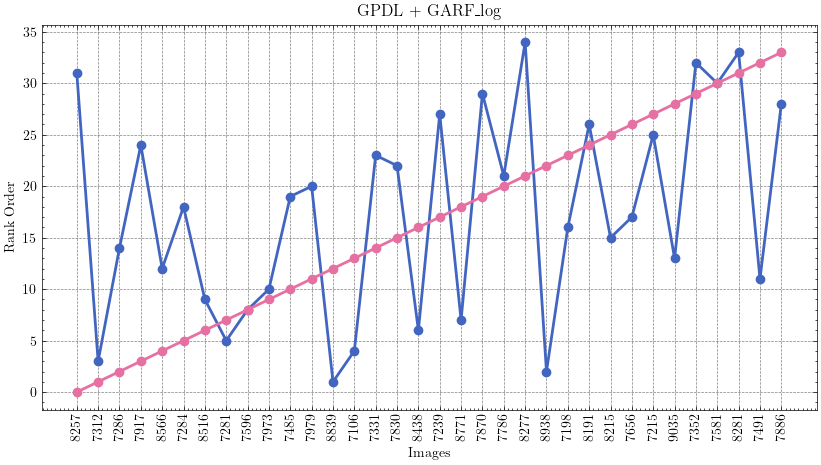

In [710]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.5987009533551513), pvalue=np.float64(0.0006011269804757552)),
 'SRCC': SignificanceResult(statistic=np.float64(0.4147783251231526), pvalue=np.float64(0.025269044626520402)),
 'KRCC': SignificanceResult(statistic=np.float64(0.29556650246305416), pvalue=np.float64(0.02464236076525901)),
 'NDCG': np.float64(0.9651007760842063)}

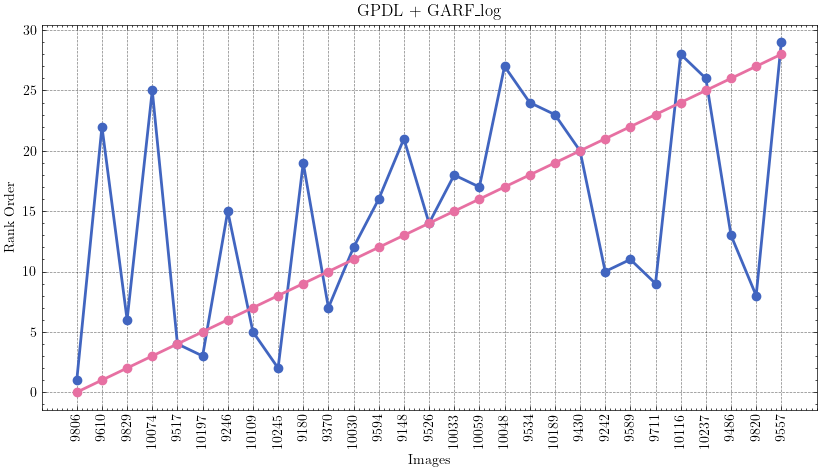

In [711]:
evaluate_design(test_df_b)

#### Stage 8

{'PLCC': PearsonRResult(statistic=np.float64(0.3245051152611443), pvalue=np.float64(0.06114739736686588)),
 'SRCC': SignificanceResult(statistic=np.float64(0.386096256684492), pvalue=np.float64(0.024110901919780478)),
 'KRCC': SignificanceResult(statistic=np.float64(0.2762923351158646), pvalue=np.float64(0.021573817362857652)),
 'NDCG': np.float64(0.9675099256220934)}

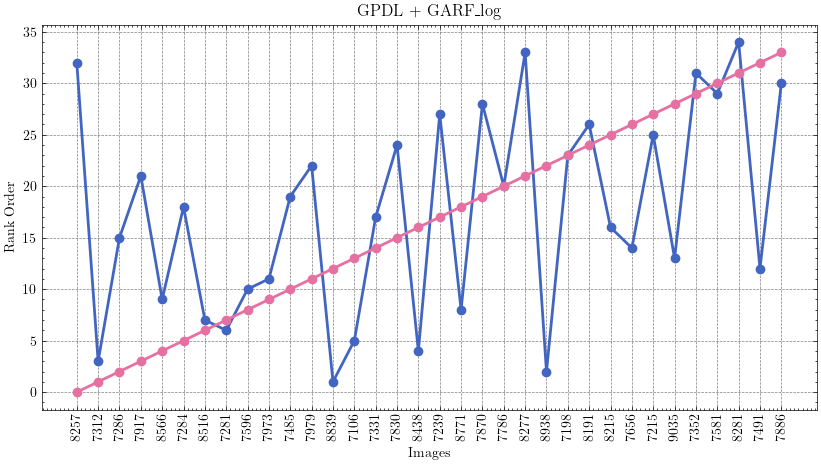

In [129]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.6007213907897602), pvalue=np.float64(0.0005695573513676602)),
 'SRCC': SignificanceResult(statistic=np.float64(0.40985221674876837), pvalue=np.float64(0.027239676114376568)),
 'KRCC': SignificanceResult(statistic=np.float64(0.3152709359605911), pvalue=np.float64(0.016235008804067922)),
 'NDCG': np.float64(0.9649664237899369)}

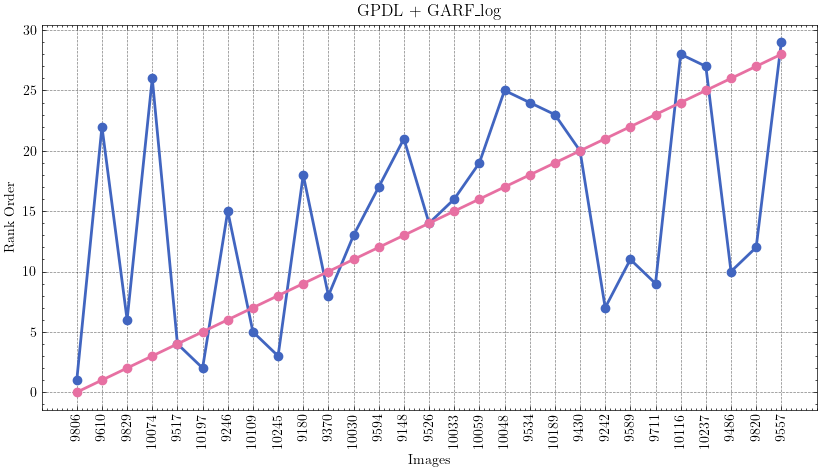

In [130]:
evaluate_design(test_df_b)

#### Stage 9

{'PLCC': PearsonRResult(statistic=np.float64(0.3516106436865243), pvalue=np.float64(0.04143323084657363)),
 'SRCC': SignificanceResult(statistic=np.float64(0.4194041252864782), pvalue=np.float64(0.01354563966927994)),
 'KRCC': SignificanceResult(statistic=np.float64(0.28698752228163993), pvalue=np.float64(0.016998722030130732)),
 'NDCG': np.float64(0.971409466384329)}

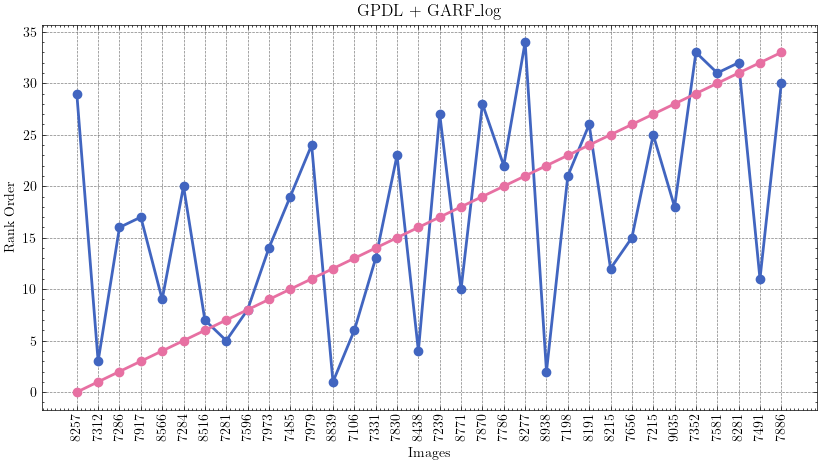

In [181]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.6084764890220611), pvalue=np.float64(0.00046147166766259803)),
 'SRCC': SignificanceResult(statistic=np.float64(0.431527093596059), pvalue=np.float64(0.019419670666215638)),
 'KRCC': SignificanceResult(statistic=np.float64(0.3201970443349753), pvalue=np.float64(0.014568735220692323)),
 'NDCG': np.float64(0.9662386523843268)}

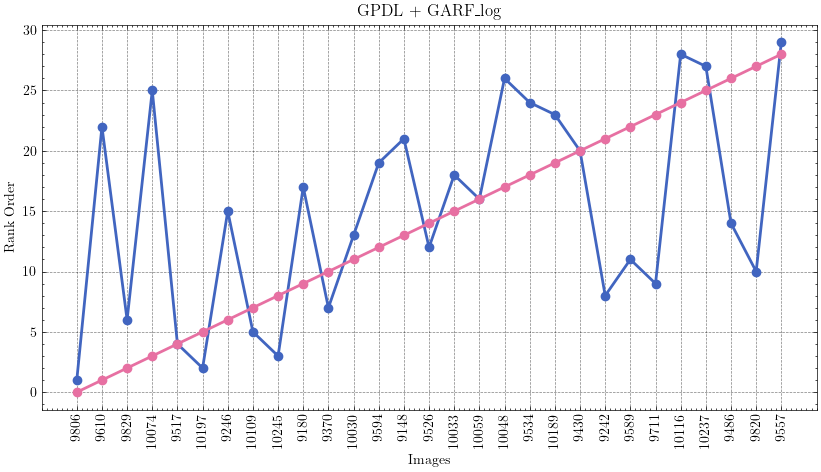

In [182]:
evaluate_design(test_df_b)

#### Stage 10

{'PLCC': PearsonRResult(statistic=np.float64(0.28798781253437916), pvalue=np.float64(0.09860907276868208)),
 'SRCC': SignificanceResult(statistic=np.float64(0.306951871657754), pvalue=np.float64(0.0774325174198337)),
 'KRCC': SignificanceResult(statistic=np.float64(0.21925133689839574), pvalue=np.float64(0.0682418422202999)),
 'NDCG': np.float64(0.968952045215961)}

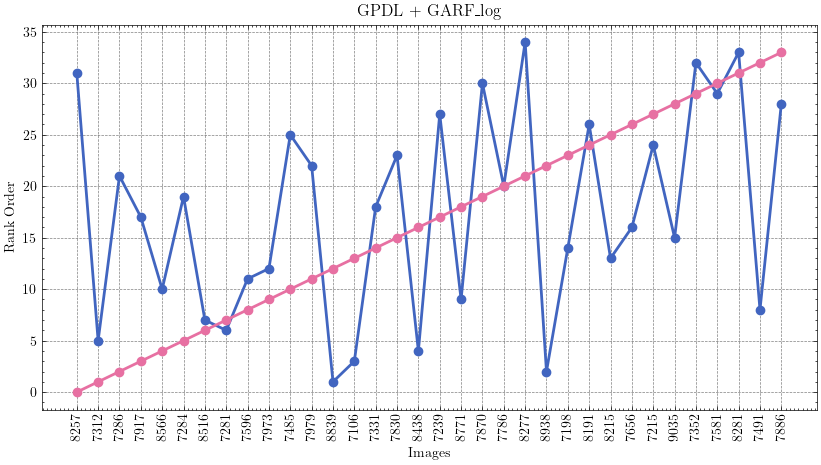

In [257]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.615757640005407), pvalue=np.float64(0.00037684499156513603)),
 'SRCC': SignificanceResult(statistic=np.float64(0.4369458128078817), pvalue=np.float64(0.017785618725815026)),
 'KRCC': SignificanceResult(statistic=np.float64(0.33497536945812806), pvalue=np.float64(0.010425310470696099)),
 'NDCG': np.float64(0.9666424005309554)}

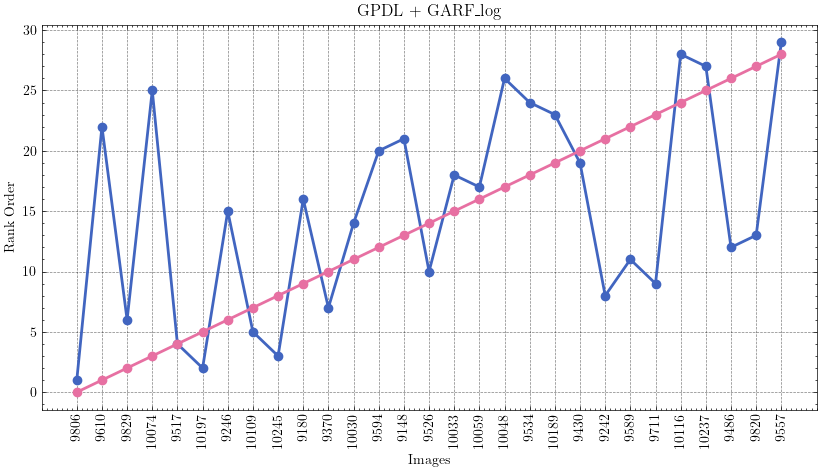

In [258]:
evaluate_design(test_df_b)

#### Stage 11

{'PLCC': PearsonRResult(statistic=np.float64(0.2694997893044148), pvalue=np.float64(0.12323444490053707)),
 'SRCC': SignificanceResult(statistic=np.float64(0.2974789915966386), pvalue=np.float64(0.08751958519694707)),
 'KRCC': SignificanceResult(statistic=np.float64(0.21568627450980396), pvalue=np.float64(0.07285186047170678)),
 'NDCG': np.float64(0.9637047265021448)}

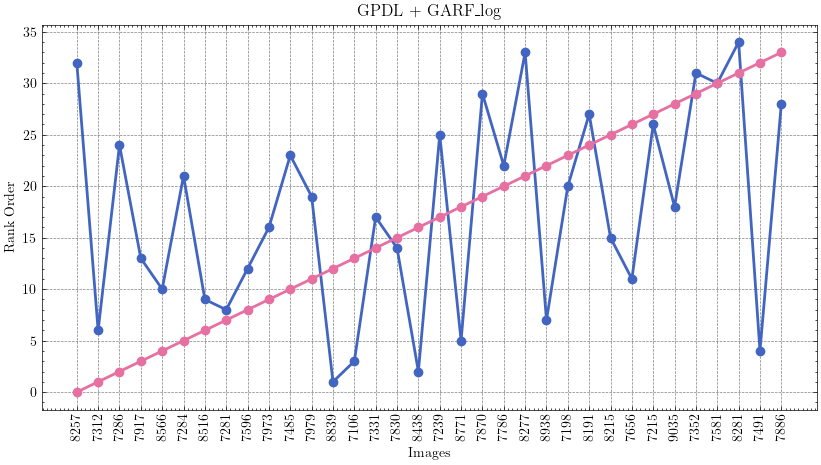

In [307]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.6450301660926151), pvalue=np.float64(0.00015831991853300646)),
 'SRCC': SignificanceResult(statistic=np.float64(0.47684729064039394), pvalue=np.float64(0.008912641755401947)),
 'KRCC': SignificanceResult(statistic=np.float64(0.3743842364532019), pvalue=np.float64(0.003964491818416243)),
 'NDCG': np.float64(0.968641685790376)}

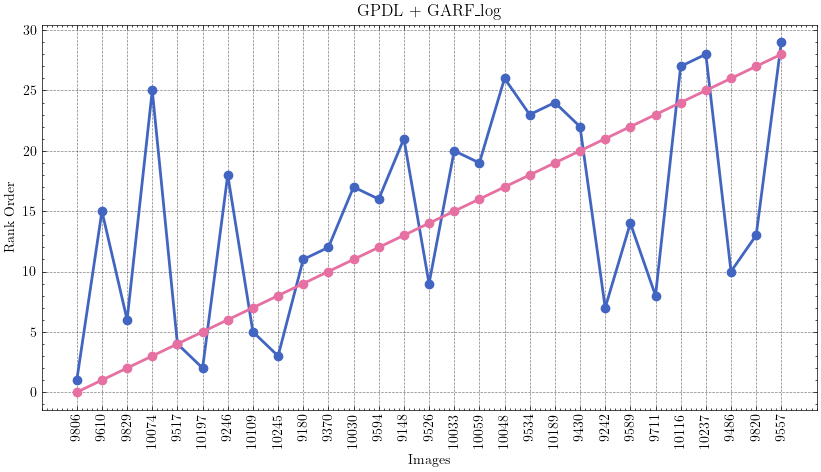

In [308]:
evaluate_design(test_df_b)

#### Stage 12

{'PLCC': PearsonRResult(statistic=np.float64(0.2427427594708651), pvalue=np.float64(0.16658225568549953)),
 'SRCC': SignificanceResult(statistic=np.float64(0.22077922077922077), pvalue=np.float64(0.2095685387585165)),
 'KRCC': SignificanceResult(statistic=np.float64(0.17647058823529416), pvalue=np.float64(0.14220750241091126)),
 'NDCG': np.float64(0.964481708745271)}

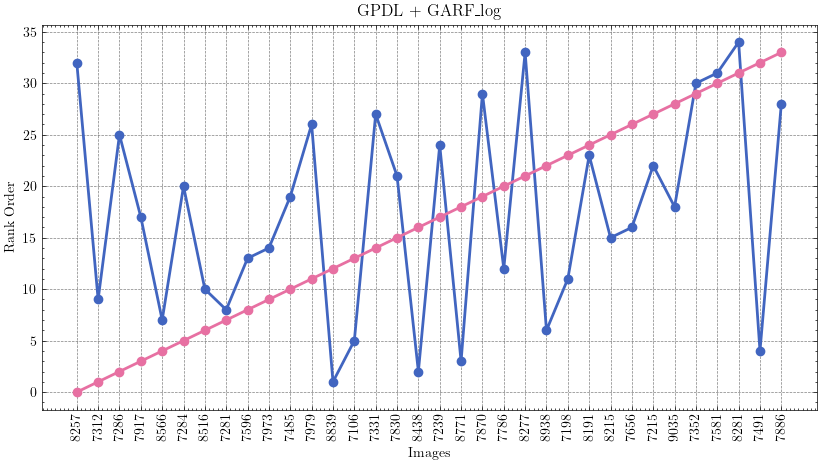

In [362]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.622949007138582), pvalue=np.float64(0.0003069873520799487)),
 'SRCC': SignificanceResult(statistic=np.float64(0.43793103448275855), pvalue=np.float64(0.01750108782955084)),
 'KRCC': SignificanceResult(statistic=np.float64(0.33497536945812806), pvalue=np.float64(0.010425310470696099)),
 'NDCG': np.float64(0.9698358997701066)}

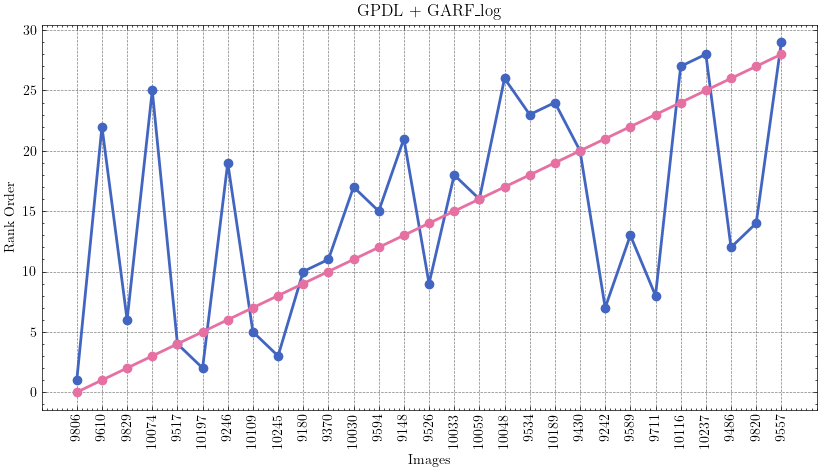

In [364]:
evaluate_design(test_df_b)

#### Stage 13

{'PLCC': PearsonRResult(statistic=np.float64(0.28622891276025536), pvalue=np.float64(0.10077650749391086)),
 'SRCC': SignificanceResult(statistic=np.float64(0.32895339954163483), pvalue=np.float64(0.057483661498631225)),
 'KRCC': SignificanceResult(statistic=np.float64(0.23707664884135474), pvalue=np.float64(0.04864946525493411)),
 'NDCG': np.float64(0.96587429417984)}

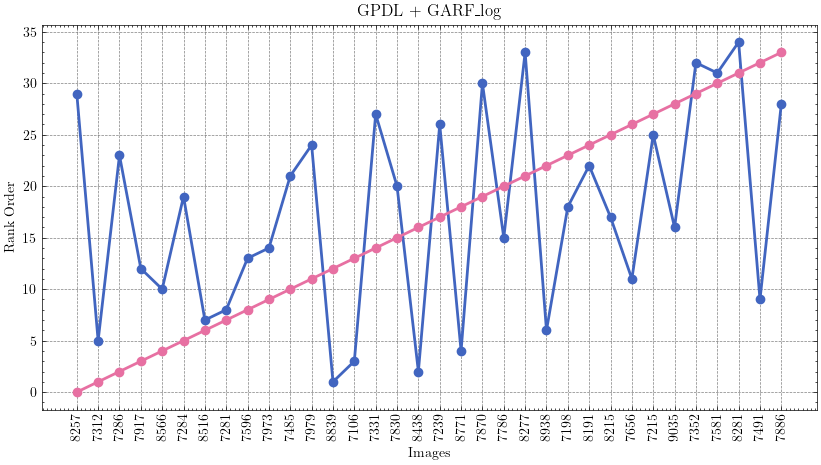

In [429]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.6445662984948967), pvalue=np.float64(0.00016062318972782263)),
 'SRCC': SignificanceResult(statistic=np.float64(0.5059113300492609), pvalue=np.float64(0.005111555806593828)),
 'KRCC': SignificanceResult(statistic=np.float64(0.38423645320197036), pvalue=np.float64(0.0030586572531963864)),
 'NDCG': np.float64(0.9682004776739469)}

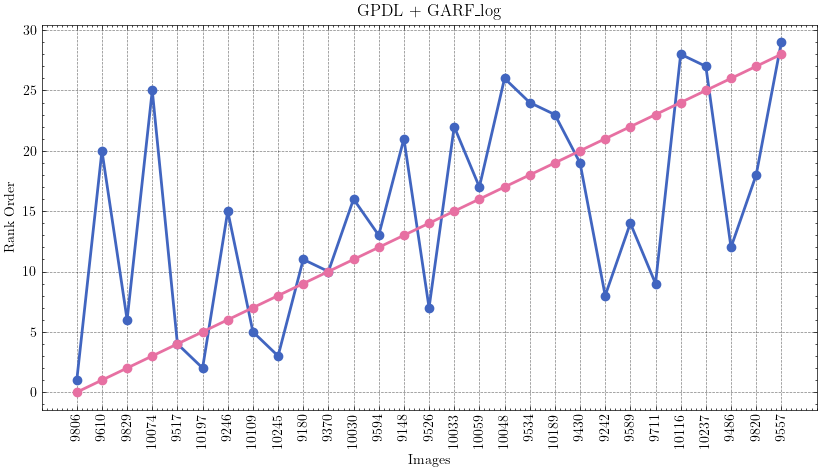

In [430]:
evaluate_design(test_df_b)

{'PLCC': PearsonRResult(statistic=np.float64(0.5329496494514631), pvalue=np.float64(0.001173957980087221)),
 'SRCC': SignificanceResult(statistic=np.float64(0.4762414056531703), pvalue=np.float64(0.004411010109364946)),
 'KRCC': SignificanceResult(statistic=np.float64(0.33689839572192515), pvalue=np.float64(0.005081525059547978)),
 'NDCG': np.float64(0.9671229801936939)}

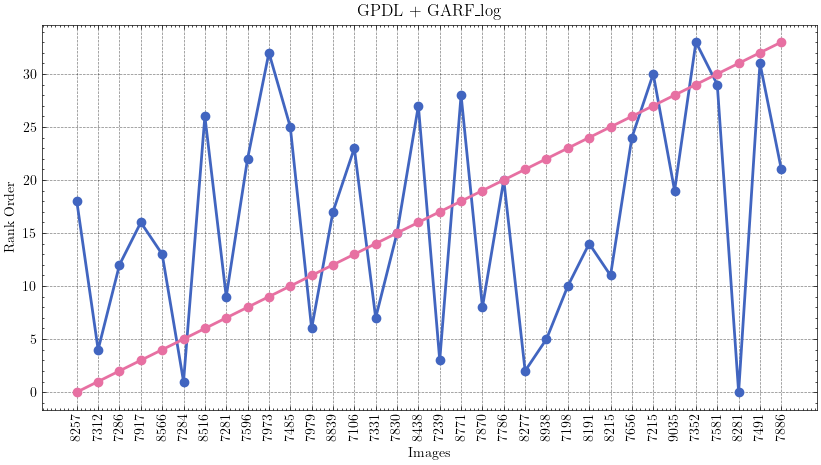

In [ ]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.5329496494514631), pvalue=np.float64(0.001173957980087221)),
 'SRCC': SignificanceResult(statistic=np.float64(0.4762414056531703), pvalue=np.float64(0.004411010109364946)),
 'KRCC': SignificanceResult(statistic=np.float64(0.33689839572192515), pvalue=np.float64(0.005081525059547978)),
 'NDCG': np.float64(0.9671229801936939)}

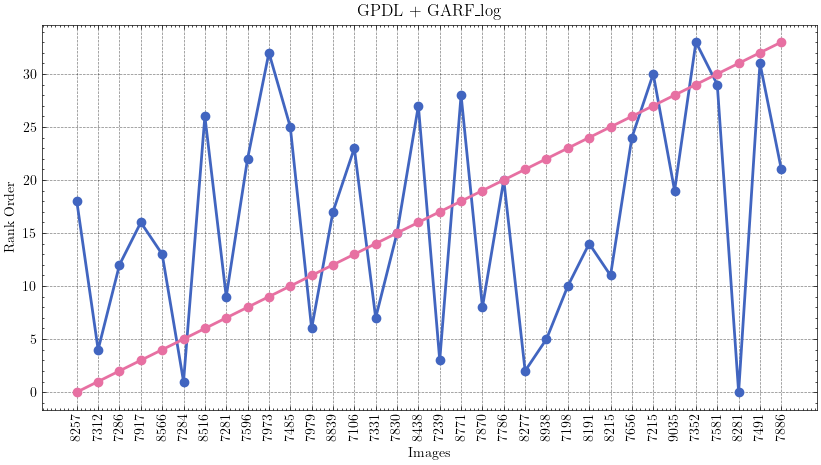

In [ ]:
evaluate_design(test_df_b)

#### Genetic Algorithm

In [431]:
def forget_curve(t, S=20):
    return np.exp(-t/S)

In [422]:
total_feat_mse = total_feat_mse + new_feat_mse

In [423]:
total_feat_mse = sorted(total_feat_mse, key=lambda x: list(x.values())[0], reverse=True)

In [424]:
feat_importances = {list(d.keys())[0]: i for i, d in enumerate(total_feat_mse)}

In [425]:
feat_pool = {feat: desc[feat] for feat in feat_importances.keys()}

In [426]:
n = len(feat_pool.keys())

In [427]:
feat_importances = {k: forget_curve(n - v, n) for k, v in feat_importances.items()}

In [432]:
feat_importances

{'total_wirelength': np.float64(0.36787944117144233),
 'number_vias': np.float64(0.38674102345450123),
 'number_of_multi_cut_vias': np.float64(0.4065696597405991),
 'number_of_single_cut_vias': np.float64(0.42741493194872665),
 'max_overcon': np.float64(0.44932896411722156),
 'total_overcon': np.float64(0.4723665527410147),
 'worst_layer_gcell_overcon_rate': np.float64(0.4965853037914095),
 'hard_to_access_pins_ratio': np.float64(0.522045776761016),
 'instance_blockages_count': np.float64(0.5488116360940264),
 'early_gr_overflow_percentage': np.float64(0.5769498103804866),
 'horizontal_overflow_percentage': np.float64(0.6065306597126334),
 'initial_placement_efficiency': np.float64(0.6376281516217733),
 'congestion_prediction_accuracy': np.float64(0.6703200460356393),
 'area_based_congestion_density': np.float64(0.7046880897187134),
 'multi_layer_pin_access_variability': np.float64(0.7408182206817179),
 'average_layer_congestion': np.float64(0.7788007830714049),
 'pin_density_variance_

In [373]:
import re
import requests
from prompt_log import CROSS_OVER_PROMPT, MUTATION_PROMPT, DEDUPLICATION_PROMPT, CODE_GEN_PROMPT


def prompt_selection(task_id, desc, feat_pool, feat_importances):
    if task_id == 0:
        prompts = [CROSS_OVER_PROMPT.format(existing_features=desc, routability_log=logging_file_string, feat_pool=feat_pool)]
    else:
        pd = np.random.uniform(0, 1, len(feat_importances))
        prompts = []
        for i, (feat, imp) in enumerate(feat_importances.items()):
            if pd[i] < imp:
                feat = {feat: desc[feat]}
                mutated_prompt = MUTATION_PROMPT.format(existing_features=desc, routability_log=logging_file_string, feature=feat)
                prompts.append(mutated_prompt)
    return prompts

def mllm_single_inference(prompt, type="json"):
    payload = {
    "model": "gpt-4o",
    "messages": [
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": prompt,
            }
        ]
        }
    ],
    "max_tokens": 2000,
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    response = response.json()['choices'][0]['message']['content'] 
    pattern = r"```json([\s\S]*?)```" if type == "json" else r"```python([\s\S]*?)```"
    response = re.search(pattern, response).group(1).strip()
    print(response)
    return response

def feat_extractor(task_id, responses):
    if task_id == 0:
        new_feat = json.loads(responses[0])
    else:
        new_feat = {}
        for response in responses:
            new_feat.update(json.loads(response))
            
    return new_feat

def featgen_inference(prompts):
    responses = []
    for prompt in prompts:
        response = mllm_single_inference(prompt)
        responses.append(response)
    return responses

def deduplicator(feat_pool, new_feat):
    prompt = DEDUPLICATION_PROMPT.format(feat_pool=feat_pool, new_feat_pool=new_feat)
    response = mllm_single_inference(prompt)
    response = json.loads(response)
    dup_feat = [r["feature"] for r in response]
    no_dup_feat = {k: v for k, v in new_feat.items() if k not in dup_feat}
    return no_dup_feat

def code_gen(new_feats):
    responses = []
    for new_feat, definition in new_feats.items():
        prompt = CODE_GEN_PROMPT.format(feature={new_feat: definition}, routability_log=logging_file_string, feature_name=new_feat)
        response = mllm_single_inference(prompt, type="python")
        responses.append(response)
    return responses

In [374]:
task_ids ={0: "cross-over", 1: "mutation"}
task_prob =[0.5, 0.5] 

def genetic_instruct(feat_pool, feat_importances):
    task_id = np.random.choice(list(task_ids.keys()), p=task_prob)
    print(f"Task: {task_ids[task_id]}")
    prompts = prompt_selection(task_id, desc, feat_pool, feat_importances)
    responses = featgen_inference(prompts)
    new_feats = feat_extractor(task_id, responses)
    no_dup_feat = deduplicator(desc, new_feats)
    return no_dup_feat

In [375]:
new_feat_pool = genetic_instruct(feat_pool, feat_importances)

Task: cross-over
{
  "macro_density_variance": "A measure of how evenly macros are distributed across the design. High variance can indicate potential hotspots of congestion due to uneven resource distribution.",
  
  "clock_tree_depth_distribution": "An analysis of the depth of the clock tree across various regions of the design, which can affect signal synchronization and contribute to congestion in deeper areas.",
  
  "routing_congestion_recovery_rate": "The measure of how effectively routing congestion drops across routing iterations, indicating the effectiveness of optimization strategies applied during the design process.",
  
  "vault_layer_separation_metric": "Evaluates the effectiveness of routing layers in keeping voltage-sensitive nets isolated from each other, reducing crosstalk and interference that can lead to congestion.",
  
  "layer_prioritization_effectiveness": "A feature assessing how well the strategic prioritization of certain layers helps in resolving congested 

In [376]:
new_feat_pool

{'macro_density_variance': 'A measure of how evenly macros are distributed across the design. High variance can indicate potential hotspots of congestion due to uneven resource distribution.',
 'clock_tree_depth_distribution': 'An analysis of the depth of the clock tree across various regions of the design, which can affect signal synchronization and contribute to congestion in deeper areas.',
 'routing_congestion_recovery_rate': 'The measure of how effectively routing congestion drops across routing iterations, indicating the effectiveness of optimization strategies applied during the design process.',
 'vault_layer_separation_metric': 'Evaluates the effectiveness of routing layers in keeping voltage-sensitive nets isolated from each other, reducing crosstalk and interference that can lead to congestion.',
 'layer_prioritization_effectiveness': 'A feature assessing how well the strategic prioritization of certain layers helps in resolving congested areas, providing insights into the c

In [377]:
error_code = {
 "rudy_intensity_distribution_vector": "vector detailing the distribution intensity of RUDY density across micro-regions, highlighting non-uniform patterns"
}
# code_feat = code_gen(error_code)
code_feat = code_gen(new_feat_pool)

import re
import numpy as np

def macro_density_variance(logging_file_string: str) -> dict:
    # Regex to extract congestion values for each layer
    congestion_pattern = re.compile(r'#  M(\d) +(?:[HV])? +\d+\(\s*([\d.]+%)\)')
    
    # Find all congestion percentage matches
    congestion_matches = congestion_pattern.findall(logging_file_string)

    # Extract the congestion values and convert them to float percentages
    congestion_percentages = [float(match[1].strip('%')) for match in congestion_matches]

    # Calculate variance of congestion percentages
    if congestion_percentages:
        variance = np.var(congestion_percentages)
    else:
        variance = 0.0
    
    return {"macro_density_variance": variance}

# Example usage:
# log_data = "..."  # This would be your string containing the entire log data.
# result = macro_density_variance(log_data)
# print(result)
import re

def clock_tree_depth_distribution(logging_file_string: str) -> dict:
    # Extract total clock 

#### Stage 1 Function

In [19]:
import re

def num_prerouted_nets(logging_file_string: str) -> dict:
    # Using regex to find the line with 'Num Prerouted Nets' and extract the number
    match = re.search(r"Num Prerouted Nets = (\d+)", logging_file_string)
    
    if match:
        feature_value = int(match.group(1))  # Convert the extracted string to an integer
    else:
        feature_value = 0  # Default value if not found
    
    return {"num_prerouted_nets": feature_value}


def num_unroutable_nets(logging_file_string: str) -> dict:
    # Define a pattern to match unroutable nets information
    pattern = r'#Total number of routable nets = (\d+).\n#(\d+) unrouted \(routable\)'
    
    # Search the pattern within the log
    match = re.search(pattern, logging_file_string)
    
    # Extract the feature value from the match.
    if match:
        unroutable_nets = int(match.group(2))
    else:
        unroutable_nets = 0  # Default to 0 if not found

    return {"num_unroutable_nets": unroutable_nets}


def clock_nets_wire_length(logging_file_string: str) -> dict:
    # Define the regex pattern to find the line containing the clock nets wire length
    pattern = r"Total eGR-routed clock nets wire length: ([\d.]+)um"
    
    # Search for the pattern in the logging file string
    match = re.search(pattern, logging_file_string)
    
    # Extract the feature value if the pattern is found, otherwise set it to None
    feature_value = float(match.group(1)) if match else None
    
    return {"clock_nets_wire_length": feature_value}


def layer_resource_utilization(logging_file_string: str) -> dict:
    # Define a regex pattern to match the resource analysis section
    pattern = r"#\s+Resource Analysis:\s+\n" \
              r"#.+\n" \
              r"(?:#\s+Layer\s+Direction\s+Track\s+Blocked\s+Gcell\s+Blocked\s*\n)" \
              r"((?:#\s+M\d+\s+\w+\s+\d+\s+\d+\s+\d+\s+\d+\.?\d*%\s*\n)*)"

    # Search for the resource analysis section
    match = re.search(pattern, logging_file_string, re.MULTILINE)

    if match:
        # Extract the relevant block of text
        resource_analysis_data = match.group(1)
        
        layer_utilizations = []
        
        # Define a regex pattern to extract data for each layer
        layer_pattern = r"#\s+(M\d+)\s+\w+\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+\.?\d*)%"
        
        # Find all matches for each layer
        for layer_match in re.finditer(layer_pattern, resource_analysis_data):
            layer_name = layer_match.group(1)
            available_tracks = int(layer_match.group(2))
            blocked_tracks = int(layer_match.group(3))
            total_gcell = int(layer_match.group(4))
            blocked_percentage = float(layer_match.group(5))

            # Compute utilization based on the number of available and blocked tracks
            utilization = (blocked_tracks / available_tracks) * 100 if available_tracks != 0 else 0
            layer_utilizations.append(utilization)

        return {"layer_resource_utilization": np.mean(layer_utilizations)}
    
    return {"layer_resource_utilization": 0}


def gcell_grid_size(logging_file_string: str) -> dict:
    # Use regex to find the grid size value mentioned in the log
    # Pattern explanation:
    # "G-grids with size=" : fixed string to identify the gcell grid size line
    # "(\d+)" : capture one or more digits (the grid size)
    match = re.search(r"G-grids with size=(\d+) tracks", logging_file_string)
    
    # If the pattern is found, extract the grid size
    if match:
        feature_value = int(match.group(1))
    else:
        feature_value = 0
    
    return {"gcell_grid_size": feature_value}


def total_num_nets(logging_file_string: str) -> dict:
    # Define the regular expression pattern to find the relevant line in the log
    pattern = r"Total number of nets in the design = (\d+)."
    
    # Search for the pattern in the log file string
    match = re.search(pattern, logging_file_string)
    
    # Extract the value from the first matching group and convert it to an integer
    if match:
        feature_value = int(match.group(1))
    else:
        feature_value = 0
    
    # Return the result in a dictionary
    return {"total_num_nets": feature_value}

def hard_to_access_pins_ratio(logging_file_string: str) -> dict:
    # Define regex to extract the number of difficult-to-access instances
    difficult_access_pattern = re.search(r'(\d+) out of (\d+)\(\d+\.\d+%\) instances may be difficult to be accessed', logging_file_string)

    if difficult_access_pattern:
        difficult_instance_count = int(difficult_access_pattern.group(1))
        total_instance_count = int(difficult_access_pattern.group(2))
        
        # Calculate the ratio
        hard_to_access_ratio = difficult_instance_count / total_instance_count
    else:
        # If the pattern is not found, return None or 0 as per your design choice
        hard_to_access_ratio = None

    return {"hard_to_access_pins_ratio": hard_to_access_ratio}


def pin_access_warnings(logging_file_string: str) -> dict:
    # Use regex to find all occurrences of the relevant warning message
    warnings_pattern = r"#WARNING \(NRDB-2085\) Pin access impeded"
    
    # Find all matches with the pattern in the log string
    warnings = re.findall(warnings_pattern, logging_file_string)
    
    # The number of matches is the number of pin access warnings
    feature_value = len(warnings)
    
    return {"pin_access_warnings": feature_value}

def congestion_iteration_stats(logging_file_string: str) -> dict:
    # Define a regex pattern to extract congestion statistics from each routing iteration
    iteration_pattern = r'#start global routing iteration (\d+)\.\.\.\s*#.*?\n\s*#cpu time = .*?\n\s*#elapsed time = (.*?)\s*\n.*?%Gcell\s*OverCon\n.*?\n#(?:\s*(?:M[1-8]|AP)\s*\(.*?\)\s*.*?\(%\d*\.\d*%\)\s*)+\s*#\s*Total\s*(.*?)\s*\('

    # Use regex findall to extract all matches
    matches = re.findall(iteration_pattern, logging_file_string)

    # Extracting congestion statistics from matches
    congestion_stats = 0
    for iteration, elapsed_time, total in matches:
        congestion_stats = float(total.strip('%'))

    # Returning the congestion statistics as the feature value
    return {"congestion_iteration_stats": congestion_stats}

In [20]:
new_feat_func_list = [
    num_prerouted_nets,
    num_unroutable_nets,
    clock_nets_wire_length,
    layer_resource_utilization,
    gcell_grid_size,
    total_num_nets,
    hard_to_access_pins_ratio,
    pin_access_warnings,
    congestion_iteration_stats
]

In [21]:
new_feat_func_list[8](logging_file_string)

{'congestion_iteration_stats': 0}

#### Stage 2 Function

In [22]:
import re

def pg_blockages_count(logging_file_string: str) -> dict:
    # Look for the line with 'PG Blockages' and extract the number following it
    pg_blockages_match = re.search(r'#PG Blockages\s*:\s*(\d+)', logging_file_string)
    
    # Get the count from the match object, defaulting to 0 if not found
    feature_value = int(pg_blockages_match.group(1)) if pg_blockages_match else 0
    
    return {"pg_blockages_count": feature_value}


def total_congestion_areas(logging_file_string: str) -> dict:
    # Use regex to find the total number of congested Gcells from the congestion analysis section
    congestion_pattern = r"#\s*M1\s*(?:\(1-3\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*M2\s*(?:\(2-4\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*M3\s*(?:\(3-5\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*M4\s*(?:\(4-6\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*M5\s*(?:\(5-7\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*M6\s*(?:\(6-8\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*M7\s*(?:\(7-9\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*M8\s*(?:\(8-10\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*AP\s*(?:\(9-11\)|\d+)\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%\n" \
                         r"#\s*Total\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+(\d+)\(.+?\)%\s+\(.*?\)%"
    
    matches = re.search(congestion_pattern, logging_file_string, re.MULTILINE)
    
    if matches:
        # The total number of congested Gcell areas should be the sum of all congested Gcells found in the pattern
        total_congested_gcells = sum(int(matches.group(i)) for i in range(1, 37))
    else:
        total_congested_gcells = 0
    
    # Returning the extracted feature as a dictionary
    return {"total_congestion_areas": total_congested_gcells}


def routing_resource_analysis(logging_file_string: str) -> dict:
    # Define a regular expression pattern to extract the routing resource analysis table
    pattern = r"#\s+Layer\s+Direction\s+Routing\s+#Avail\s+#Track\s+#Total\s+%Gcell.*?#\s+Total\s+"

    # Use a regular expression to find the table and extract information
    match = re.search(pattern, logging_file_string, re.DOTALL)

    if not match:
        return {"routing_resource_analysis": 0}

    # Extract the relevant portion of the log
    resource_analysis_section = match.group(0)

    # Use another regex to extract the percentage blocked for each layer
    layer_pattern = r"#\s+(\w+)\s+\([HV]\)\s+\d+\s+\d+\s+\d+\s+\d+\s+([\d.]+)%"

    # Find all instances of line matches
    matches = re.findall(layer_pattern, resource_analysis_section)

    # Convert the list of tuples into a dictionary
    resource_analysis_dict = {layer: float(blocked) for layer, blocked in matches}

    return {"routing_resource_analysis": resource_analysis_dict}


def constrained_nets_count(logging_file_string: str) -> dict:
    # Regular expression to find lines mentioning nets with constraints
    # Look for "routable nets have" followed by specifications including "extra spacing" or "layer"
    constrained_nets_pattern = r'(\d+) routable nets have only (\S+?) (details|wires|extra spacing|layer)'

    # Find all matches using re.findall(), which returns a list of all non-overlapping matches
    matches = re.findall(constrained_nets_pattern, logging_file_string)

    # Extract the count of constrained nets
    # We are interested in the first group from each match which contains the number of nets
    constrained_nets_total = sum(int(match[0]) for match in matches)

    return {"constrained_nets_count": constrained_nets_total}

def track_pitch_analysis(logging_file_string: str) -> dict:
    # Define a regex pattern to capture track pitch and line-2-via pitch information
    pattern = re.compile(r"# (\w{1,2})\s+(H|V).*?Track-Pitch\s*=\s*([\d.]+).*?Line-2-Via Pitch\s*=\s*([\d.]+)", re.MULTILINE)
    
    # Find all matches for the pattern
    matches = pattern.findall(logging_file_string)
    
    # Organize the extracted data
    pitches = [float(track_pitch) for layer, _, track_pitch, line2via_pitch in matches]
    
    feature_value = pitches  # Assign extracted pitches as the feature value
    
    return {"track_pitch_analysis": np.mean(feature_value)}


def instance_blockages_count(logging_file_string: str) -> dict:
    # Use regex to find the instance blockages count from the log
    match = re.search(r'#Instance Blockages\s*:\s*(\d+)', logging_file_string)
    
    # Extract the value if the pattern is found
    feature_value = int(match.group(1)) if match else None

    return {"instance_blockages_count": feature_value}


def total_rerouted_nets(logging_file_string: str) -> dict:
    # Regex to capture the line with net and rerouting information
    # Look for entries specifying "global routing iteration" and counting needs or changes made.
    iteration_reroute_pattern = r'#\s+start global routing iteration \d+\.\.\.\n.*?\n#.*?routable nets = (\d+)\.'
    iteration_reroute_matches = re.findall(iteration_reroute_pattern, logging_file_string, re.DOTALL)
    
    total_rerouted = 0
    if iteration_reroute_matches:
        previous_nets = 0
        for count_str in iteration_reroute_matches:
            current_count = int(count_str)
            # If current iteration results in fewer nets, it may suggest rerouting attempts
            if previous_nets and current_count < previous_nets:
                total_rerouted += previous_nets - current_count
            previous_nets = current_count

    return {"total_rerouted_nets": total_rerouted}

In [23]:
new_feat_func_list = [pg_blockages_count, total_congestion_areas, routing_resource_analysis, constrained_nets_count, track_pitch_analysis, instance_blockages_count, total_rerouted_nets]

In [24]:
new_feat_func_list[6](logging_file_string)

{'total_rerouted_nets': 0}

#### Stage 3 Function

In [25]:
import re

def routing_blockages_count(logging_file_string: str) -> dict:
    # Use regex to match the specific line containing "#Routing Blockages"
    match = re.search(r"#Routing Blockages\s*:\s*(\d+)", logging_file_string)
    
    # If a match is found, extract the number as an integer
    feature_value = int(match.group(1)) if match else 0
    
    # Return the result in the specified dictionary format
    return {"routing_blockages_count": feature_value}


def clock_nets_count(logging_file_string: str) -> dict:
    # Using regex to find the number of clock nets
    match = re.search(r'There are (\d+) clock nets', logging_file_string)
    
    # Default to 0 if not found
    feature_value = int(match.group(1)) if match else 0
    
    return {"clock_nets_count": feature_value}


def early_gr_overflow_percentage(logging_file_string: str) -> dict:
    # Define a regex pattern to capture both horizontal and vertical early global routing overflows
    pattern = r"Early Global Route overflow of layer group 1:\s*([\d.]+)% H \+ ([\d.]+)% V"
    
    # Search the string using the regex pattern
    match = re.search(pattern, logging_file_string)
    
    if match:
        # Extract horizontal and vertical overflow percentages as floats
        horizontal_overflow = float(match.group(1))
        vertical_overflow = float(match.group(2))
        
        # Calculate the total overflow as the sum of horizontal and vertical overflows
        total_overflow = horizontal_overflow + vertical_overflow
        
        # Return the total overflow percentage
        return {"early_gr_overflow_percentage": total_overflow}
    else:
        # Return None or some default value if no match is found
        return {"early_gr_overflow_percentage": 0}


def layer_length_distribution(logging_file_string: str) -> dict:
    # Find the section with wire lengths using a regular expression
    match = re.search(r'#Total wire length on (.*?)\n#Total number of vias', logging_file_string, re.DOTALL)
    
    # Initialize a dictionary to hold wire lengths for each layer
    layer_lengths = {}
    
    if match:
        # Extract the lines of interest
        lines = match.group(1).strip().split('\n')
        
        # Regex to capture the layer and its corresponding wire length
        layer_length_pattern = re.compile(r'#Total wire length on LAYER (\w+) = ([\d.]+) um')

        for line in lines:
            # Match each line in the extracted section using the regex
            layer_match = layer_length_pattern.match(line)
            if layer_match:
                layer = layer_match.group(1)
                length = float(layer_match.group(2))
                layer_lengths[layer] = length

    # Feature name
    feature_name = "layer_length_distribution"

    return {feature_name: np.mean(list(layer_lengths.values()))}


def vertical_overflow_percentage(logging_file_string: str) -> dict:
    # Define the regex pattern to match vertical overflow percentage
    pattern = r"Overflow after GR: [0-9.]+% H \+ ([0-9.]+)% V"
    
    # Search for the pattern in the log
    match = re.search(pattern, logging_file_string)
    
    # If a match is found, capture the vertical overflow percentage
    if match:
        vertical_overflow = float(match.group(1))
    else:
        vertical_overflow = None  # Or some indication that it wasn't found, e.g., 0.0
    
    # Return the feature name and the extracted value
    return {"vertical_overflow_percentage": vertical_overflow}


def congestion_warnings_count(logging_file_string: str) -> dict:
    # Define a regex pattern to find warnings related to congestion
    congestion_warning_pattern = r'#WARNING \(NRDB-2085\) Pin access impeded near Instance'

    # Use re.findall to find all occurrences of the pattern in the log string
    warnings_found = re.findall(congestion_warning_pattern, logging_file_string)

    # Calculate the number of congestion warnings
    feature_value = len(warnings_found)

    return {"congestion_warnings_count": feature_value}


def initial_memory_usage(logging_file_string: str) -> dict:

    # Extract the initial memory usage at the start of routing using regular expression.
    # The relevant memory usage information is found after 'globalRoute' keyword.
    memory_pattern = r"#Start globalRoute on [^\n]*\n#(?:[^\n]*\n)*#\(MEM=([\d.]+)"
    
    match = re.search(memory_pattern, logging_file_string)
    
    if match:
        # Convert the matched memory usage to float.
        feature_value = float(match.group(1))
    else:
        # Default in case no match is found
        feature_value = 0

    return {"initial_memory_usage": feature_value}

In [26]:
new_feat_func_list = [routing_blockages_count, clock_nets_count, early_gr_overflow_percentage, layer_length_distribution, vertical_overflow_percentage, congestion_warnings_count, initial_memory_usage]

In [27]:
new_feat_func_list[3](logging_file_string)

{'layer_length_distribution': np.float64(125506.125)}

#### Stage 4 Function

In [28]:
def congestion_heatmap_density(logging_file_string: str) -> dict:
    # Regex to find the congestion details in the logs
    congestion_pattern = re.compile(r'#  M\d+\s+\d+\(([\d.]+)%\)\s+\d+\(([\d.]+)%\)\s+\d+\(([\d.]+)%\)\s+\d+\(([\d.]+)%\)', re.MULTILINE)

    # Find all matches in the logging string
    matches = congestion_pattern.findall(logging_file_string)

    # Calculate average congestion heatmap density
    total_density = 0
    total_layers = 0
    for match in matches:
        # Convert string percentages to float values and sum them
        total_density += sum(float(percent) for percent in match)
        total_layers += 1

    # Average density over the layers
    feature_value = total_density / total_layers if total_layers > 0 else 0

    return {"congestion_heatmap_density": feature_value}


def cross_layer_congestion_variance(logging_file_string: str) -> dict:
    # Define a regular expression pattern to capture congestion levels for each layer
    pattern = r'M([1-9])  \(\d+\)\s+(\d+)\(\s*\d+\.\d+%\)\s+(\d+)\(\s*\d+\.\d+%\)\s+(\d+)\(\s*\d+\.\d+%\)\s+\(\s*(\d+\.\d+)%\)'
    
    # Find all matches in the log string
    matches = re.findall(pattern, logging_file_string)
    
    # Extract congestion percentages from matches
    congestion_percentages = [float(match[4]) for match in matches]
    
    # Calculate the variance of congestion percentages
    congestion_variance = np.var(congestion_percentages)
    
    return {"cross_layer_congestion_variance": congestion_variance}


def horizontal_overflow_percentage(logging_file_string: str) -> dict:
    # Define a regex pattern to capture the horizontal overflow percentage
    pattern = r"Overflow after Early Global Route\s*(\d*\.\d*)%\s*H"

    # Search the log string for the overflow line
    match = re.search(pattern, logging_file_string)

    # Extract the horizontal overflow percentage if a match is found
    if match:
        horizontal_overflow = float(match.group(1))
    else:
        horizontal_overflow = 0.0  # or handle as needed if no match is found

    return {"horizontal_overflow_percentage": horizontal_overflow}


def pin_access_obstacle_density(logging_file_string: str) -> dict:
    # Use regex to find the line indicating the number of difficult-to-access instances
    obstructed_access_pattern = re.compile(r'#(\d+) out of (\d+)\(\d+\.\d+%\) instances may be difficult to be accessed')
    
    # Search for the pattern in the log file
    match = obstructed_access_pattern.search(logging_file_string)
    
    if match:
        difficult_access_count = int(match.group(1))  # Extracting the number of difficult-to-access instances
        total_instance_count = int(match.group(2))    # Extracting the total number of instances

        # Calculate the density of obstacles near pin access points
        if total_instance_count > 0:
            obstacle_density = difficult_access_count / total_instance_count
        else:
            obstacle_density = 0
    else:
        # Default to zero if information is not found
        obstacle_density = 0

    return {"pin_access_obstacle_density": obstacle_density}


def dynamic_congestion_adaptation(logging_file_string: str) -> dict:
    # Extract the 'Overflow after GR' values using regex
    overflow_after_gr = re.search(r'Overflow after GR: (\d+\.\d+)% H \+ (\d+\.\d+)% V', logging_file_string)
    
    # If overflow values are found, calculate the dynamic congestion adaptation metric 
    if overflow_after_gr:
        overflow_h = float(overflow_after_gr.group(1))
        overflow_v = float(overflow_after_gr.group(2))
        
        # A simple metric based on overflow percentage for example purposes
        feature_value = (overflow_h + overflow_v) / 2
    else:
        # If no overflow data is found, return a default or null value
        feature_value = 0

    return {"dynamic_congestion_adaptation": feature_value}

In [29]:
new_feat_func_list = [congestion_heatmap_density, cross_layer_congestion_variance, horizontal_overflow_percentage, pin_access_obstacle_density, dynamic_congestion_adaptation]

In [30]:
new_feat_func_list[4](logging_file_string)

{'dynamic_congestion_adaptation': 2.855}

#### Stage 5 Function

In [31]:
import re

def layer_violation_count(logging_file_string: str) -> dict:
    # Initialize a pattern to capture layer violation counts from the congestion analysis section.
    # We look for "Layer" followed by the congestion details in a structured manner.
    # Assuming layers start with an "M" followed by a number or "AP", and violation numbers precede parentheses.
    
    pattern = r'M(\d+|AP).+?\s+(\d+)\([\d.]+%\)'
    
    # Search and capture all matches from the specified section
    matches = re.findall(pattern, logging_file_string)
    
    # Convert the matches to an integer list to sum up
    violation_counts = [int(match[1]) for match in matches]
    
    # Calculate the total layer violation count
    total_violations = sum(violation_counts)
    
    # Construct the return dictionary with the feature name and its calculated value
    return {"layer_violation_count": total_violations}


def average_via_density(logging_file_string: str) -> dict:
    # Extract the total number of vias from the log
    via_search = re.search(r"Total number of vias = (\d+)", logging_file_string)
    total_vias = int(via_search.group(1)) if via_search else None
    
    # Logic for determining the design area
    # For simplicity, let's assume a constant design area of 1 unit (since the area isn't provided)
    design_area = 1
    
    # Calculate the average via density
    if total_vias is not None:
        via_density = total_vias / design_area
    else:
        via_density = None

    return {"average_via_density": via_density}


def congestion_prediction_accuracy(logging_file_string: str) -> dict:

    # Regular expression to find reported congestion in the Early Global Routing section
    early_gr_congestion_match = re.search(r'Early Global Route overflow of layer group 1: (\d+\.\d+)% H \+ (\d+\.\d+)% V', logging_file_string)
    
    # Regular expression to find actual congestion after Global Routing
    global_routing_congestion_match = re.search(r'Overflow after GR: (\d+\.\d+)% H \+ (\d+\.\d+)% V', logging_file_string)
    
    if early_gr_congestion_match and global_routing_congestion_match:
        # Extract early congestion values
        early_h = float(early_gr_congestion_match.group(1))
        early_v = float(early_gr_congestion_match.group(2))
        
        # Extract actual congestion values
        actual_h = float(global_routing_congestion_match.group(1))
        actual_v = float(global_routing_congestion_match.group(2))
        
        # Calculate the accuracy as the inverse of the absolute difference normalized by the predicted values
        accuracy_h = 1 - abs(early_h - actual_h) / (early_h if early_h != 0 else 1)
        accuracy_v = 1 - abs(early_v - actual_v) / (early_v if early_v != 0 else 1)
        
        # Average out horizontal and vertical accuracies for a single congestion prediction accuracy value
        congestion_prediction_accuracy_value = (accuracy_h + accuracy_v) / 2
    else:
        # If there is an issue in finding the matches, we return a default accuracy of 0 or None
        congestion_prediction_accuracy_value = 0
    
    return {"congestion_prediction_accuracy": congestion_prediction_accuracy_value}

def ir_drop_concern_zones(logging_file_string: str) -> dict:
    # Initialize the concern zones metric
    concern_zones = 0
    
    # Regex patterns to search for congestion/overcon warnings
    congestion_pattern = r'#\s+Total\s+overcon\s+=\s+(\d+\.\d+)%'
    warning_pattern = r'#WARNING\s+\(NRDB-2085\) Pin access impeded near Instance'
    
    # Find the congestion percentage
    congestion_match = re.search(congestion_pattern, logging_file_string)
    if congestion_match:
        congestion_percentage = float(congestion_match.group(1))
        # Assuming that if congestion is over a certain threshold, it's a concern
        if congestion_percentage > 5.0:  # Example threshold
            concern_zones += 1
    
    # Count the number of pin access impeded warnings
    warning_count = len(re.findall(warning_pattern, logging_file_string))
    if warning_count > 5:  # Example concern threshold for the number of warnings
        concern_zones += 1
    
    # Return the value as a single feature in a dictionary
    return {"ir_drop_concern_zones": concern_zones}


def clock_tree_balance_metric(logging_file_string: str) -> dict:
    # Extract total wire length from the log
    total_wire_length_match = re.search(r'Total wire length = (\d+\.\d+) um', logging_file_string)
    total_wire_length = float(total_wire_length_match.group(1)) if total_wire_length_match else 0
    
    # Extract total eGR-routed clock nets wire length
    clock_wire_length_match = re.search(r'Total eGR-routed clock nets wire length: (\d+\.\d+)um', logging_file_string)
    clock_wire_length = float(clock_wire_length_match.group(1)) if clock_wire_length_match else 0
    
    # Calculate the clock tree balance metric as a ratio of clock wire length to total wire length
    clock_tree_balance_metric = clock_wire_length / total_wire_length if total_wire_length != 0 else 0

    return {"clock_tree_balance_metric": clock_tree_balance_metric}

In [32]:
new_feat_func_list = [layer_violation_count, average_via_density, congestion_prediction_accuracy, ir_drop_concern_zones, clock_tree_balance_metric]

In [33]:
new_feat_func_list[4](logging_file_string)

{'clock_tree_balance_metric': 0.02493650907311601}

#### Stage 6 Function

In [34]:
import re

def initial_placement_efficiency(logging_file_string: str) -> dict:
    # Extracting Early Global Route overflow rate, congestion by layer (eGR), and total overcon congestion metrics
    early_gr_overflow_match = re.search(r'Early Global Route overflow.*?(\d+\.\d+)% H.*?(\d+\.\d+)% V', logging_file_string)
    global_route_max_overcon_match = re.search(r'Max overcon.*?=\s(\d+)\s*tracks\.', logging_file_string)
    global_route_total_overcon_match = re.search(r'Total overcon.*?=\s(\d+\.\d+)%\.', logging_file_string)

    # Default values if matches are not found
    early_gr_horizontal = 0.0
    early_gr_vertical = 0.0
    max_overcon_tracks = 0
    total_overcon_percent = 0.0

    if early_gr_overflow_match:
        early_gr_horizontal = float(early_gr_overflow_match.group(1))
        early_gr_vertical = float(early_gr_overflow_match.group(2))

    if global_route_max_overcon_match:
        max_overcon_tracks = int(global_route_max_overcon_match.group(1))
    
    if global_route_total_overcon_match:
        total_overcon_percent = float(global_route_total_overcon_match.group(1))

    # Calculating the initial placement efficiency as an inverse function of congestion metrics
    # The base metric considers both early and overall congestion factors.
    feature_value = 1 / (1 + early_gr_horizontal + early_gr_vertical + total_overcon_percent + max_overcon_tracks)

    return {"initial_placement_efficiency": feature_value}


def macro_placement_variability(logging_file_string: str) -> dict:
    # Use regex to find all occurrences and variations of "macro" related patterns
    # Assumption: Variability could be inferred from variations of lines containing "macro"
    # Feel free to adjust the regex pattern based on the actual log format

    # Find occurrences of lines with the keyword 'macro' (case-insensitive)
    macro_lines = re.findall(r'\bmacro\b', logging_file_string, flags=re.IGNORECASE)

    # Calculate macro_placement_variability as the count of unique macro lines
    # In a more comprehensive analysis, further metadata extraction could be performed
    macro_placement_variability = len(macro_lines)

    return {"macro_placement_variability": macro_placement_variability}


def power_mesh_robustness(logging_file_string: str) -> dict:
    # Extract power net information: num reading of "VDD" and "VSS"
    vdd_count = len(re.findall(r'\bVDD\b', logging_file_string))
    vss_count = len(re.findall(r'\bVSS\b', logging_file_string))

    # Extract congestion information by capturing total congestion numbers
    congestion_match = re.search(r'Total\s+Overcon\s+[\d,]+\s+\(([\d.]+)%\)', logging_file_string)
    total_congestion_percentage = float(congestion_match.group(1)) if congestion_match else 0.0

    # Additional features might be the missing of speed of router, direct warning messages, etc.
    power_warnings = len(re.findall(r'\bWARNING\b.+(VDD|VSS|power)\b', logging_file_string))
    
    # Calculate a simple robustness score considering factors
    # Note: Formula is hypothetical/demonstrative
    power_mesh_score = (vdd_count + vss_count) / (1 + power_warnings + total_congestion_percentage)

    return {"power_mesh_robustness": power_mesh_score}


def timing_derate_factor(logging_file_string: str) -> dict:
    # This is a mock-up regex pattern assuming a specific way derate factors are defined in a typical log.
    # Adjust the regular expression based on actual data that defines the derate value.
    pattern = r'set_timing_derate\s*-value\s*(\d+\.?\d*)'
    
    # Search the log for the matching pattern
    match = re.search(pattern, logging_file_string)
    
    # Extract the derate factor if it exists, else default to a predetermined value (e.g., 1.0 if there's a fallback)
    feature_value = float(match.group(1)) if match else 1.0  # Assuming 1.0 if not explicitly defined
    
    return {"timing_derate_factor": feature_value}


def floorplan_density_uniformity(logging_file_string: str) -> dict:
    
    # Use regex to find congestion percentages by layer from the early global route section
    congestion_pattern = r'\[NR-eGR\]      M(\d+)  \(\d+\)\s+(\d+)\(([\d\.]+)%\)\s+(\d+)\(([\d\.]+)%\)\s+(\d+)\(([\d\.]+)%\)\s+\(([\d\.]+)%\)'
    
    matches = re.findall(congestion_pattern, logging_file_string)

    # Calculate uniformity score as an example metric (this could vary)
    # Let's use a simple standard deviation to evaluate variation in congestion across layers
    congestion_values = [float(match[7]) for match in matches]
    
    if not congestion_values:
        return {"floorplan_density_uniformity": 0}  # Handle case if no data is found

    average_congestion = sum(congestion_values) / len(congestion_values)
    variance = sum((x - average_congestion) ** 2 for x in congestion_values) / len(congestion_values)
    standard_deviation = variance ** 0.5

    # Uniformity score could be inversely related to std deviation
    # Lower standard deviation -> higher uniformity
    floorplan_density_uniformity_score = 1 / (1 + standard_deviation)  # Simple transformation

    return {"floorplan_density_uniformity": floorplan_density_uniformity_score}


def power_distribution_efficiency(logging_file_string: str) -> dict:
    # Regex to find power-related routing blockages and congestion levels
    # We are interested in "PG Blockages" and "Total overcon" which gives us an insight into power efficiency
    
    # Extract the number of PG blockages
    pg_blockages = re.search(r'#PG Blockages\s*:\s*(\d+)', logging_file_string)
    pg_blockages_value = int(pg_blockages.group(1)) if pg_blockages else 0

    # Extract total overcon percentage
    total_overcon = re.search(r'Total overcon = (\d+\.\d+)%', logging_file_string)
    total_overcon_value = float(total_overcon.group(1)) if total_overcon else 0.0

    # Calculate power_distribution_efficiency
    # A simple metric could be inverse of congestion impact merged with PG blockages
    # The lower the blockages and congestion, the higher the efficiency
    if pg_blockages_value == 0:  # Avoid division by zero
        power_efficiency = 100  # Assuming perfect efficiency if no blockages
    else:
        power_efficiency = max(0, 100 - total_overcon_value) / (pg_blockages_value ** 0.5)  # Simple inverse function

    # Normalize or transform efficiency to a reasonable scale if necessary
    feature_value = power_efficiency
    
    return {"power_distribution_efficiency": feature_value}

In [35]:
new_feat_func_list = [initial_placement_efficiency, macro_placement_variability, power_mesh_robustness, timing_derate_factor, floorplan_density_uniformity, power_distribution_efficiency]

In [36]:
new_feat_func_list[5](logging_file_string)

{'power_distribution_efficiency': 0.4771135544228551}

#### Stage 7 Function

In [40]:
import re
import numpy as np

def pin_to_pin_distance_variance(logging_file_string: str) -> dict:
    # Regex to find total wire length for each layer
    wire_lengths = re.findall(r"Total wire length on LAYER \w+ = (\d+\.\d+) um", logging_file_string)

    # Convert extracted strings to floating-point numbers
    wire_lengths = list(map(float, wire_lengths))
    
    # Calculate variance of wire lengths
    if wire_lengths:
        variance = np.var(wire_lengths)
    else:
        variance = 0.0  # Default case if no wire lengths were found

    return {"pin_to_pin_distance_variance": variance}


def macro_to_standard_cell_ratio(logging_file_string: str) -> dict:
    """
    Calculate the ratio of macros to standard cells in the routability log.
    """

    # Regular expression to find instance blockages, typically indicative of standard cell complexity.
    instance_blockages_match = re.search(r'#Instance Blockages\s*:\s*(\d+)', logging_file_string)

    # Regular expression to extract macros; assuming macro-like structures if their presence can be inferred
    # from specific log lines or known identifiers which this dataset description does not fully provide.
    # This requires domain knowledge of how macros are typically reported or inferred from similar logs.
    macro_match = re.search(r'Total\s+(\d+)\s+macro', logging_file_string, re.IGNORECASE)

    # Default counts if nothing is found
    macros = int(macro_match.group(1)) if macro_match else 1  # Using 1 to prevent division by zero
    std_cells = int(instance_blockages_match.group(1)) if instance_blockages_match else 1

    # Calculate ratio
    macro_to_std_cell_ratio = macros / std_cells

    return {"macro_to_standard_cell_ratio": macro_to_std_cell_ratio}


def utilization_map_skew(logging_file_string: str) -> dict:
    # Using regex to find all routing resource analysis results
    resource_analysis_pattern = re.compile(r"#  Layer\s+Direction\s+#Avail\s+#Track\s+#Total\s+%Gcell\n((?:# .+\n)+)")
    match = resource_analysis_pattern.search(logging_file_string)

    if match:
        resource_info = match.group(1)

        # Find all %Gcell Blocked values
        blocked_percentages = re.findall(r"#\s+[A-Za-z0-9]+\s+[VH]+\s+[0-9]+\s+[0-9]+\s+[0-9]+\s+(\d+\.\d+)%", resource_info)

        # Convert found percentages to float
        blocked_percentages = list(map(float, blocked_percentages))

        if blocked_percentages:
            # Calculate skew as the standard deviation of utilization across layers
            mean_blocked = sum(blocked_percentages) / len(blocked_percentages)
            skew = sum((x - mean_blocked) ** 2 for x in blocked_percentages) / len(blocked_percentages)
            skew **= 0.5  # Standard deviation

            return {"utilization_map_skew": skew}

    return {"utilization_map_skew": 0}

def area_based_congestion_density(logging_file_string: str) -> dict:
    # Extract congestion data for layers
    layer_congestion_matches = re.findall(r'\s*M(\d+)\s+\((\d+-?\d*)\)\s+(\d+)\((.*?)%\)\s+(\d+)?\((.*?)%\)?\s+(\d+)?\((.*?)%\)?', logging_file_string)
    
    total_congestion_percentages = []
    
    for match in layer_congestion_matches:
        _, _, _, perc_1, _, perc_2, _, perc_3 = match
        # Convert percentages to float and add them
        percentage_values = [float(p.replace('%', '')) for p in [perc_1, perc_2, perc_3] if p.strip()]
        total_congestion_percent = sum(percentage_values)
        total_congestion_percentages.append(total_congestion_percent)
    
    # Calculate the overall area-based congestion density
    if total_congestion_percentages:
        area_based_congestion_density_value = sum(total_congestion_percentages) / len(total_congestion_percentages)
    else:
        area_based_congestion_density_value = 0.0
    
    return {"area_based_congestion_density": area_based_congestion_density_value}


def pad_pin_connectivity_challenges(logging_file_string: str) -> dict:
    # Define a regex pattern to capture warnings related to pin access impediments
    pin_access_pattern = r"^#WARNING \(NRDB-2085\) Pin access impeded near .*?padPin.*?$"

    # Find all occurrences of the pattern in the logging file string
    pin_access_issues = re.findall(pin_access_pattern, logging_file_string, re.MULTILINE)

    # The feature value could be the number of such warnings, indicating the extent of challenges
    feature_value = len(pin_access_issues)

    return {"pad_pin_connectivity_challenges": feature_value}



def inter_clock_net_interference(logging_file_string: str) -> dict:
    # Initialize the feature value
    feature_value = 0
    
    # Regex pattern to find reports on clock nets
    clock_net_pattern = r"\[NR-eGR\] There are (\d+) clock nets"
    clock_overflow_pattern = r"\[NR-eGR\] (.+?) Clock nets overflow after"

    # Search for clock net declaration
    clock_nets = re.search(clock_net_pattern, logging_file_string)
    if clock_nets:
        num_clock_nets = int(clock_nets.group(1))
        
        # Add clock net count to feature
        feature_value += num_clock_nets
    
    # Search for clock net overflow occurrences
    clock_overflows = re.findall(clock_overflow_pattern, logging_file_string)
    if clock_overflows:
        feature_value += len(clock_overflows)

    # Return the dictionary with the feature
    return {"inter_clock_net_interference": feature_value}

In [41]:
new_feat_func_list = [pin_to_pin_distance_variance, macro_to_standard_cell_ratio, utilization_map_skew, area_based_congestion_density, pad_pin_connectivity_challenges, inter_clock_net_interference]

In [42]:
new_feat_func_list[5](logging_file_string)

{'inter_clock_net_interference': 35}

#### Stage 8 Function

In [104]:
def average_inter_layer_via_spacing(logging_file_string: str) -> dict:
    # Use regex to find the total number of vias
    vias_pattern = r"Total number of vias = (\d+)"
    vias_match = re.search(vias_pattern, logging_file_string)
    total_vias = int(vias_match.group(1)) if vias_match else 0

    # Use regex to find total wire length
    wire_length_pattern = r"Total wire length = ([\d.]+) um"
    wire_length_match = re.search(wire_length_pattern, logging_file_string)
    total_wire_length = float(wire_length_match.group(1)) if wire_length_match else 0.0

    # Calculate average inter-layer via spacing
    if total_vias > 0:
        average_spacing = total_wire_length / total_vias
    else:
        average_spacing = float('inf')  # Handle division by zero

    # Return the average spacing as a feature
    return {"average_inter_layer_via_spacing": average_spacing}

# Example usage
log_content = "Put the log content here"
print(average_inter_layer_via_spacing(log_content))
import re
from collections import defaultdict

def layer_specific_congestion_histogram(logging_file_string: str) -> dict:
    # Use regex to extract the congestion details by layer
    pattern = r'\[NR-eGR\] +([M\d]+) *\(-?\d+\) +([0-9]+)\(([\d\.]+)%\) +([0-9]+)\(([\d\.]+)%\) +([0-9]+)\(([\d\.]+)%\) +\(([\d\.]+)%\)'

    matches = re.findall(pattern, logging_file_string)
    
    # Prepare the congestion histogram
    histogram = defaultdict(lambda: [0, 0, 0, 0])

    for match in matches:
        layer = match[0]
        for i in range(1, 5):
            histogram[layer][i - 1] = float(match[i * 2])  # Capture the percentage values

    return {"layer_specific_congestion_histogram": 0}


def multi_layer_pin_access_variability(logging_file_string: str) -> dict:
    # Use regex to capture the percentage of Gcell for congestion per layer
    congestion_pattern = re.compile(r'M(\d+).*\((\d+\.\d+)%\)')
    layer_congestion = congestion_pattern.findall(logging_file_string)

    # Extract layer numbers and their respective congestion percentages
    layer_congestion_dict = {int(layer): float(congestion) for layer, congestion in layer_congestion}

    # Calculate the standard deviation of congestion percentages as a measure of variability
    if len(layer_congestion_dict) > 1:
        mean_congestion = sum(layer_congestion_dict.values()) / len(layer_congestion_dict)
        variance = sum((value - mean_congestion) ** 2 for value in layer_congestion_dict.values()) / len(layer_congestion_dict)
        variability = variance ** 0.5  # Standard deviation
    else:
        variability = 0

    # The feature is the calculated variability
    return {"multi_layer_pin_access_variability": variability}


def diagonal_overflow_percentage(logging_file_string: str) -> dict:
    # Search for the overflow percentages in the log after global routing
    horizontal_overflow_match = re.search(r'Overflow after.*?(\d+\.\d+)% H', logging_file_string)
    vertical_overflow_match = re.search(r'Overflow after.*?(\d+\.\d+)% V', logging_file_string)

    # If matches are found, parse them to floats
    horizontal_overflow = float(horizontal_overflow_match.group(1)) if horizontal_overflow_match else 0.0
    vertical_overflow = float(vertical_overflow_match.group(1)) if vertical_overflow_match else 0.0

    # Calculate an overall diagonal overflow percentage as a hypothetical metric
    # This is not based directly on the log but represents an idea of combining these values
    diagonal_overflow = (horizontal_overflow + vertical_overflow) / 2

    # Feature value assignment
    feature_value = diagonal_overflow
    
    return {"diagonal_overflow_percentage": feature_value}

{'average_inter_layer_via_spacing': inf}


In [105]:
new_feat_func_list = [average_inter_layer_via_spacing, layer_specific_congestion_histogram, multi_layer_pin_access_variability, diagonal_overflow_percentage]

In [106]:
new_feat_func_list[1](logging_file_string)

{'layer_specific_congestion_histogram': 0}

#### Stage 9 Function

In [154]:
import re

def average_layer_congestion(logging_file_string: str) -> dict:
    # Regex pattern to extract congestion percentage for each layer
    congestion_pattern = re.compile(r'M(\d+)\s+\(.+?\)\s+\d+\(\s*([\d.]+)%\)')

    # Find all matches
    matches = congestion_pattern.findall(logging_file_string)

    # Calculate the average congestion
    if matches:
        congestion_values = [float(match[1]) for match in matches]
        average_congestion = sum(congestion_values) / len(congestion_values)
    else:
        average_congestion = 0.0

    return {"average_layer_congestion": average_congestion}


def congestion_amplification_factor(logging_file_string: str) -> dict:
    # Define the regex pattern to capture the 'Total overcon' percentage
    total_overcon_pattern = r"Total overcon = (\d+\.\d+)%"
    
    # Search for the pattern in the log string
    match = re.search(total_overcon_pattern, logging_file_string)
    
    # If a match is found, convert the captured group to a float and use it as the feature value
    if match:
        feature_value = float(match.group(1))
    else:
        # If the pattern is not found, default the feature value to 0 or handle as needed
        feature_value = 0.0

    return {"congestion_amplification_factor": feature_value}


def macro_interference_level(logging_file_string: str) -> dict:
    # Pattern to match the number of instance blockages
    instance_blockages_pattern = r'#Instance Blockages\s*:\s*(\d+)'

    # Find all matching patterns
    instance_blockages_match = re.search(instance_blockages_pattern, logging_file_string)

    # Extract the number of instance blockages
    if instance_blockages_match:
        instance_blockages = int(instance_blockages_match.group(1))
    else:
        instance_blockages = 0

    # Calculate macro_interference_level as the number of instance blockages
    # This is a heuristic as congestion can be multifactorial
    macro_interference_level = instance_blockages

    return {"macro_interference_level": macro_interference_level}


def early_congestion_warning_response(logging_file_string: str) -> dict:
    # Initialize variables to hold the congestion information
    early_overflow_h = 0.0
    early_overflow_v = 0.0
    final_overflow_h = 0.0
    final_overflow_v = 0.0
    
    # Regex patterns to extract early and final overflow values
    early_global_route_pattern = r"Overflow after Early Global Route (\d+\.\d+)% H \+ (\d+\.\d+)% V"
    final_global_route_pattern = r"Overflow after GR: (\d+\.\d+)% H \+ (\d+\.\d+)% V"
    
    # Search for early overflow values
    early_match = re.search(early_global_route_pattern, logging_file_string)
    if early_match:
        early_overflow_h = float(early_match.group(1))
        early_overflow_v = float(early_match.group(2))
    
    # Search for final overflow values after global routing
    final_match = re.search(final_global_route_pattern, logging_file_string)
    if final_match:
        final_overflow_h = float(final_match.group(1))
        final_overflow_v = float(final_match.group(2))
    
    # We can take the difference between early and final overflow values to assess the response to congestion
    response_metric_h = early_overflow_h - final_overflow_h
    response_metric_v = early_overflow_v - final_overflow_v
    
    # Construct a single scalar metric to represent overall congestion warning response
    # For simplicity, we can take the average improvement in both horizontal and vertical overflow
    feature_value = (response_metric_h + response_metric_v) / 2
    
    return {"early_congestion_warning_response": feature_value}


def congestion_impact_on_timing_paths(logging_file_string: str) -> dict:
    """
    Calculate the impact of congestion on timing paths by analyzing
    the vertical congestion overflow percentage from the log.
    This metric potentially indicates how congestion could lead to timing violations.
    """
    # Extract the congestion overflow percentages for vertical routing (V)
    vertical_congestion_pattern = r'Overflow after GR: (\d+\.\d+)% H \+ (\d+\.\d+)% V'
    match = re.search(vertical_congestion_pattern, logging_file_string)
    
    if match:
        # Extract the vertical overflow percentage
        vertical_overflow_percentage = float(match.group(2))

        # Use the vertical overflow as an indicator of congestion impact on timing paths
        # Since vertical routing often impacts long-path signals, we take its value as a component of congestion impact
        # The extracted value itself serves as the feature metric in this simplified context

        feature_value = vertical_overflow_percentage
    else:
        # Set a default or indicative value when no match is found, indicating no congestion (or inability to ascertain)
        feature_value = 0.0

    return {"congestion_impact_on_timing_paths": feature_value}

In [155]:
new_feat_func_list = [average_layer_congestion, congestion_amplification_factor, macro_interference_level, early_congestion_warning_response, congestion_impact_on_timing_paths]

In [157]:
new_feat_func_list[0](logging_file_string)

{'average_layer_congestion': 2.86375}

#### Stage 10 Function

In [224]:
import re

def layer_specific_via_density(logging_file_string: str) -> dict:
    # Use regex to extract lines containing via information for each layer
    via_pattern = re.compile(r'# M(\d)\s+\w+\s+\d+\.\d+um,\s+number of vias:\s+(\d+)')
    
    # Dictionary to store the number of vias per layer
    vias_per_layer = {}

    # Find all matches in the log
    matches = via_pattern.findall(logging_file_string)

    # Calculate via density for each layer
    for layer, num_vias in matches:
        layer = int(layer)
        num_vias = int(num_vias)
        vias_per_layer[f'M{layer}'] = num_vias  # We assume the density calculations later, so only via counts needed now.

    # Compute via density as total vias / number of layers
    total_vias = sum(vias_per_layer.values())
    if matches:
        num_layers = len(matches)
        via_density = total_vias / num_layers
    else:
        via_density = 0

    return {"layer_specific_via_density": via_density}


def placement_blockages_percentage(logging_file_string: str) -> dict:
    # Placeholder for extracted data
    total_tracks = 0
    blocked_tracks = 0

    # Regex pattern to extract number of available tracks and blocked tracks/percentage per layer
    track_pattern = re.compile(r'#\s+(\S+)\s+\D+\s+\d+\s+\(\d+\.\d+%\)')
    
    # Regex to extract blockage percentages in resources section
    blockage_pattern = re.compile(r'\s+(\S+)\s+\(.*?\)\s+\D*\d+\s+\((\d+\.\d+)%\)')
    
    # Extract using regex; assuming each layer information is properly formatted as per the sample log
    for match in blockage_pattern.finditer(logging_file_string):
        _, block_perc = match.groups()
        blocked_tracks += float(block_perc)

    # Count how many layers we processed (we would normally validate against a known number)
    total_layers = len(blockage_pattern.findall(logging_file_string))
    
    # Weighted average of blockage percentages
    feature_value = (blocked_tracks / total_layers) if total_layers else 0
    
    return {"placement_blockages_percentage": feature_value}


def dynamic_routing_adjustment_rate(logging_file_string: str) -> dict:
    # Using re.findall to count occurrences of "start global routing iteration"
    # Assuming each occurrence represents an adjustment to the routing paths
    iteration_matches = re.findall(r'start global routing iteration', logging_file_string)
    
    # The number of matches corresponds to the number of dynamic routing adjustments
    feature_value = len(iteration_matches)
    
    return {"dynamic_routing_adjustment_rate": feature_value}


def clock_tree_depth_variability(logging_file_string: str) -> dict:
    # Regular expression to capture lines related to clock nets
    clock_nets_regex = re.compile(r'Total eGR-routed clock nets wire length: (\d+\.\d+)um', re.MULTILINE)

    # Find all occurrences that match the regex
    clock_nets_length = clock_nets_regex.findall(logging_file_string)

    # Convert all captured lengths to float for calculation
    clock_nets_length = list(map(float, clock_nets_length))

    # Calculate variability as the standard deviation or another variability measure
    if clock_nets_length:
        mean_length = sum(clock_nets_length) / len(clock_nets_length)
        variability = sum((x - mean_length) ** 2 for x in clock_nets_length) / len(clock_nets_length)
        variability = variability ** 0.5  # Calculate standard deviation
    else:
        variability = 0  # Default to zero if no data

    # Return the variability measures as a feature
    return {"clock_tree_depth_variability": variability}


def routing_iteration_memory_utilization(logging_file_string: str) -> dict:
    # Regex pattern to find memory utilization in each iteration
    memory_pattern = r'#start global routing iteration \d+.+?memory = ([\d.]+) \(MB\)'
    
    # Find all memory usages during routing iterations
    memory_usages = re.findall(memory_pattern, logging_file_string, re.DOTALL)
    
    # Convert extracted memory usage strings to floats
    memory_usages = list(map(float, memory_usages))
    
    # Calculate the average memory utilization
    if memory_usages:
        average_memory_utilization = sum(memory_usages) / len(memory_usages)
    else:
        average_memory_utilization = 0.0
    
    # Return the feature name and value in a dictionary
    return {"routing_iteration_memory_utilization": average_memory_utilization}


def power_grid_utilization(logging_file_string: str) -> dict:
    # This regex looks for lines mentioning track utilization, especially around M1 and M2 layers typically used for power routing
    track_utilization_matches = re.findall(r'#\s+M[12]\s+.*#Avail\s+(\d+).*#Track\s+(\d+)', logging_file_string)

    if track_utilization_matches:
        # Extracting the availability and total track details
        available_tracks = sum(int(match[0]) for match in track_utilization_matches)
        total_tracks = sum(int(match[1]) for match in track_utilization_matches)
        
        # Calculate utilization as how much was actually available for normal routes, given power grids usage
        utilization_percentage = (1 - available_tracks / total_tracks) * 100 if total_tracks > 0 else 0
    else:
        utilization_percentage = 0  # If no matches, default to 0

    return {"power_grid_utilization": utilization_percentage}


def multi_net_interference_zones(logging_file_string: str) -> dict:
    # Define the pattern using regex to find congestion percentages in different layer ranges.
    congestion_pattern = re.compile(r'#  .*Total[\s]+[\d,]+\([\d.]+%\)[\s]+([\d,]+\([\d.]+%\))')
    
    # Find all matches related to congestion percentages from the global route section.
    congestion_matches = congestion_pattern.findall(logging_file_string)
    
    # Extract the numerical congestion percentages
    congestion_percentages = []
    for match in congestion_matches:
        # Extract the percentage value from "(xx.xx%)" or similar
        percentage_match = re.search(r'\(([\d.]+)%\)', match)
        if percentage_match:
            congestion_percentages.append(float(percentage_match.group(1)))
    
    # Compute the zones where congestion percentage is significant (>2% for example)
    # Threshold is assumed based on what might represent a 'notify-worthy' congestion percentage.
    zones_of_interest = [percent for percent in congestion_percentages if percent > 2.0]

    # The result could be, for example, the count of zones of interest.
    multi_net_interference_zones_value = len(zones_of_interest)

    return {"multi_net_interference_zones": multi_net_interference_zones_value}


def pin_density_variance_map(logging_file_string: str) -> dict:
    # Find overcongested Gcells by layer
    congestion_info = re.findall(r'#  M\d\s+([^\n]+%)', logging_file_string)

    # Extract percentages for overcongested Gcells
    overcon_list = []
    for info in congestion_info:
        match = re.findall(r'\(([\d.]+)%\)', info)
        if match:
            overcon_percentages = list(map(float, match))
            overcon_list.extend(overcon_percentages)
    
    # Compute variance of these over-congestion percentages as a proxy for pin density variance
    if overcon_list:
        variance = np.var(overcon_list)
    else:
        variance = 0.0
    
    return {"pin_density_variance_map": variance}


def repeat_congestion_areas(logging_file_string: str) -> dict:
    # Pattern to match the congestion analysis section
    congestion_pattern = re.compile(r'#  Congestion Analysis: \(blocked Gcells are excluded\)(.*?)# +Total', re.DOTALL)

    # Find all matches for congestion analysis
    congestion_sections = congestion_pattern.findall(logging_file_string)
    
    # Initialize a dictionary to count congestion occurrences in each area
    congestion_count = {}

    for section in congestion_sections:
        # Extract lines with congestion data
        line_pattern = re.compile(r'#  .+?\(.*?\)\s+\d+\(.*?%\)\s+\d+\(.*?%\)\s+\d+\(.*?%\)\s+\d+\(.*?%\)\s+\(\d+\.\d*%\)')
        lines = line_pattern.findall(section)
        
        for line in lines:
            # Find the congestion percentage
            layer_data = re.findall(r'(?<=\()\d+\.\d*%', line)
            if layer_data:
                for data in layer_data:
                    percentage = float(data.strip('%'))  # Get numeric value of percentage
                    if percentage > 0:  # Consider it a congestion if percentage is greater than 0
                        layer_ident = line.split()[1]  # Assumes the second word is the layer identifier
                        if layer_ident in congestion_count:
                            congestion_count[layer_ident] += 1
                        else:
                            congestion_count[layer_ident] = 1

    # Determine if any area has persistent congestion
    persistent_congestion_count = sum(1 for count in congestion_count.values() if count > 1)

    # Return the feature value
    return {"repeat_congestion_areas": persistent_congestion_count}

In [225]:
new_feat_func_list = [layer_specific_via_density, placement_blockages_percentage, dynamic_routing_adjustment_rate, clock_tree_depth_variability, routing_iteration_memory_utilization, power_grid_utilization, multi_net_interference_zones, pin_density_variance_map, repeat_congestion_areas]

In [234]:
new_feat_func_list[8](logging_file_string)

{'repeat_congestion_areas': 0}

#### Stage 11 Function

In [273]:
import re

def peak_memory_usage(logging_file_string: str) -> dict:
    # Regular expression to find the peak memory usage in MB
    peak_memory_pattern = r"peak (?:res|memory)=(\d+(\.\d+)?)M"
    
    # Search for pattern in the logging string
    match = re.search(peak_memory_pattern, logging_file_string, re.IGNORECASE)
    
    # Extract the peak memory usage value if a match is found
    if match:
        peak_memory = float(match.group(1))
    else:
        peak_memory = None
    
    return {"peak_memory_usage": peak_memory}

def clock_net_routing_efficiency(logging_file_string: str) -> dict:
    # Pattern to capture the line containing total length of clock nets
    clock_net_length_pattern = re.compile(r"Total eGR-routed clock nets wire length:\s*([\d.]+)um")
    
    # Pattern to capture the line containing the total wire length
    total_wire_length_pattern = re.compile(r"Total wire length\s*=\s*([\d.]+) um\.")

    # Extracting the clock net wire length
    clock_net_length_match = clock_net_length_pattern.search(logging_file_string)
    total_wire_length_match = total_wire_length_pattern.search(logging_file_string)

    if clock_net_length_match and total_wire_length_match:
        clock_net_length = float(clock_net_length_match.group(1))
        total_wire_length = float(total_wire_length_match.group(1))

        # Calculate efficiency as a ratio of clock net length to total length
        feature_value = clock_net_length / total_wire_length if total_wire_length != 0 else 0
    else:
        # Default to zero if patterns do not match (i.e., missing data)
        feature_value = 0

    return {"clock_net_routing_efficiency": feature_value}

def routing_time_per_layer(logging_file_string: str) -> dict:

    # Extract time-related logs for each layer assuming "cpu time" entries for layers
    # Example regex pattern to look for cpu time and associated layer (it's assumed based on given log)
    layer_time_pattern = re.compile(r'#cpu time = ([\d:.]+)')
    
    # Find all occurrences of CPU time for routing
    times = layer_time_pattern.findall(logging_file_string)
    
    # Convert time string to seconds
    def time_to_seconds(time_str):
        h, m, s = map(float, time_str.split(':'))
        return h * 3600 + m * 60 + s
    
    total_time = sum(time_to_seconds(t) for t in times)
    
    # Assuming number of layers from the example log section provided
    # This needs to be adjusted if the log files pattern changes
    num_layers = 9
    
    routing_time_per_layer = total_time / num_layers

    return {"routing_time_per_layer": routing_time_per_layer}


def global_route_iteration_count(logging_file_string: str) -> dict:
    # Using regex to find all iterations mentioned in the log
    # Look for lines containing "start global routing iteration"
    iterations = re.findall(r'start global routing iteration \d+\.\.\.', logging_file_string)
    
    # The number of such iterations reflects the difficulty of achieving an optimized route
    feature_value = len(iterations)
    
    return {"global_route_iteration_count": feature_value}


def non_default_routing_rule_usage(logging_file_string: str) -> dict:
    # Use regex to find lines related to non-default routing rules (NDR)
    ndr_pattern = r"Total number of nets with non-default rule or having extra spacing = (\d+)"
    matches = re.search(ndr_pattern, logging_file_string)

    # Initialize feature value
    feature_value = 0

    # If a match is found, convert it from string to integer and assign to feature_value
    if matches:
        feature_value = int(matches.group(1))

    return {"non_default_routing_rule_usage": feature_value}


def route_fix_attempts(logging_file_string: str) -> dict:
    # Define a pattern to search for routing iterations as a proxy for routing attempts
    # This could be changed to look for specific warnings/messages if more examples were available.
    routing_iteration_pattern = r"#start global routing iteration \d+..."
    
    # Find all matches for routing iterations
    routing_attempts = re.findall(routing_iteration_pattern, logging_file_string)
    
    # The number of matches could indicate attempts to fix or revisit routing; adjust this as needed.
    feature_value = len(routing_attempts)
    
    return {"route_fix_attempts": feature_value}



def heatmap_cluster_density(logging_file_string: str) -> dict:
    # Use a regex pattern to capture the relevant congestion information from the log
    # Note: Since you didn't provide specific cluster information, this algorithm estimates cluster density based on overcongestion.
    
    congestion_pattern = r'#  Congestion Analysis: \(blocked Gcells are excluded\)(.*?)#  The worst congested Gcell overcon'
    match = re.search(congestion_pattern, logging_file_string, re.DOTALL)
    
    if match:
        congestion_info = match.group(1)
        
        # Extract Gcell overcongestion numbers
        gcells_overcon_pattern = r'#\s+M\d+\s+[^\n]*\s+(\d+)\(([\d\.]+%)\)\s+'
        gcell_matches = re.findall(gcells_overcon_pattern, congestion_info)
        
        if not gcell_matches:
            return {"heatmap_cluster_density": 0}
        
        # Calculate an estimate of cluster density
        total_overcong_cells = sum(int(ov[0]) for ov in gcell_matches)
        total_overcongestion_percentage = sum(float(ov[1].strip('%')) for ov in gcell_matches)
        
        # Heuristic for cluster density: We sum the total number of overcongested Gcells and consider the average congestion percentage per layer
        estimated_cluster_density = total_overcong_cells * (total_overcongestion_percentage / len(gcell_matches))
        
        return {"heatmap_cluster_density": estimated_cluster_density}
    
    return {"heatmap_cluster_density": 0}


def vertical_layer_priority(logging_file_string: str) -> dict:
    # Regular expression to capture congestion or utilization percentages for vertical layers
    vertical_layer_regex = r'M(\d+)\s+\(V\).*\(\s*(\d+\.\d+)%\)'
    
    matches = re.findall(vertical_layer_regex, logging_file_string)
    
    if not matches:
        return {"vertical_layer_priority": 0}
    
    # Calculate the average congestion percentage for all vertical layers as an indicator of vertical layer priority
    total_congestion = sum(float(congestion) for _, congestion in matches)
    average_vertical_congestion = total_congestion / len(matches)
    
    # Return the calculated feature as a dictionary
    return {"vertical_layer_priority": average_vertical_congestion}


def design_compactness_factor(logging_file_string: str) -> dict:
    # Regular expressions to extract values from the log
    total_gcell_pattern = r"Total\s+(\d*)\("
    blockage_pattern = r"Total\s+.*\(Peak Memory = \d*\.\d* .*?(\d*\.\d*%)"
    congestion_pattern = r"Congestion Analysis:.*?\d+\((\d*\.\d*%)"
    
    # Use regex to find the total number of Gcells
    total_gcells_match = re.search(total_gcell_pattern, logging_file_string)
    total_gcells = float(total_gcells_match.group(1)) if total_gcells_match else 0

    # Extract overall blockage percentage
    blockage_match = re.search(blockage_pattern, logging_file_string)
    overall_blockage_percentage = float(blockage_match.group(1).replace('%', '')) if blockage_match else 0

    # Extract congestion percentage
    congestion_match = re.search(congestion_pattern, logging_file_string)
    overall_congestion_percentage = float(congestion_match.group(1).replace('%', '')) if congestion_match else 0

    # Estimate compactness factor using extracted data
    # Higher blockage and congestion might indicate a more compact design, harder to route
    # Here, as an example, combining blockage and congestion to form a compactness factor
    compactness_factor = overall_blockage_percentage + overall_congestion_percentage

    return {"design_compactness_factor": compactness_factor}

In [274]:
new_feat_func_list = [peak_memory_usage, clock_net_routing_efficiency, routing_time_per_layer, global_route_iteration_count, non_default_routing_rule_usage, route_fix_attempts, heatmap_cluster_density, vertical_layer_priority, design_compactness_factor]

In [283]:
new_feat_func_list[8](logging_file_string)

{'design_compactness_factor': 0}

#### Stage 12 Function

In [330]:
import re

def power_and_signal_line_interference(logging_file_string: str) -> dict:

    # Use regex to find all occurrences of warnings related to pin access interference
    # This is indicated by the warning message pattern "Pin access impeded"
    interference_warnings = re.findall(r"Pin access impeded", logging_file_string)

    # The number of such warnings is a scalar value representing the level of interference
    feature_value = len(interference_warnings)

    return {"power_and_signal_line_interference": feature_value}


def substrate_coupling_congestion_indicator(logging_file_string: str) -> dict:
    # The regular expression to find the total overcon percentage
    # We look for the Total overcon followed by a percentage sign
    total_overcon_pattern = r"Total overcon =\s*([\d.]+)%"

    # Using re.search to find the pattern
    match = re.search(total_overcon_pattern, logging_file_string)
    
    if match:
        # Extracting the first group, which is the number
        total_overcon_value = float(match.group(1))
    else:
        # If not found, you might want to handle this case
        total_overcon_value = None

    # Returning the feature in a dictionary as specified
    return {"substrate_coupling_congestion_indicator": total_overcon_value}

def crosstalk_sensitive_zones(logging_file_string: str) -> dict:
    import re
    
    # Initialize the counter for potential crosstalk sensitive zones
    potential_crosstalk_sensitive_zones = 0

    # Define regex pattern to capture warnings about pin access issues due to obstructions, which may imply crosstalk problems
    pattern = r'Pin access impeded near Instance .+? and Instance .+?\. Please inspect the area near the pin for any obstacle\.'

    # Search log for all instances of the pattern that imply indirect congestion due to access issues
    matches = re.findall(pattern, logging_file_string)

    # Count occurrences, each could represent a potentially crosstalk sensitive zone
    potential_crosstalk_sensitive_zones = len(matches)

    # Return as the feature dictionary
    return {"crosstalk_sensitive_zones": potential_crosstalk_sensitive_zones}


def thermal_congestion_correlation(logging_file_string: str) -> dict:
    # Extract the number of congestion warnings
    congestion_warnings = sum(1 for _ in re.finditer(r'(?i)congested|congestion', logging_file_string))

    # Extract blockage percentage for each layer and calculate average
    blockage_pattern = r"#\s+M\d+\s+[HV]+\s+Track-Pitch\s+=\s+\d+\.\d+\s+Line-2-Via Pitch\s+=\s+\d+\.\d+\s*\n.*?\d+\.\d+\%\s*?Blocked"
    blockages = re.findall(blockage_pattern, logging_file_string, re.DOTALL)
    blockage_rates = [float(re.search(r'(\d+\.\d+)\% Blocked', blockage).group(1)) for blockage in blockages]
    avg_blockage = sum(blockage_rates) / len(blockage_rates) if blockage_rates else 0

    # A hypothetical computation: ratio of congestion warnings to average blockage (value bounded or transformed for rational comparison, e.g., multiplying by a factor for scaling)
    if avg_blockage == 0:
        feature_value = 0  # Avoid division by zero
    else:
        feature_value = (congestion_warnings / avg_blockage) * 100  # Scaling factor for sensitivity

    return {"thermal_congestion_correlation": feature_value}

In [331]:
new_feat_func_list = [power_and_signal_line_interference, substrate_coupling_congestion_indicator, crosstalk_sensitive_zones, thermal_congestion_correlation]

In [336]:
new_feat_func_list[3](logging_file_string)

{'thermal_congestion_correlation': 0}

#### Stage 13 Function

In [393]:
def macro_density_variance(logging_file_string: str) -> dict:
    # Regex to extract congestion values for each layer
    congestion_pattern = re.compile(r'#  M(\d) +(?:[HV])? +\d+\(\s*([\d.]+%)\)')
    
    # Find all congestion percentage matches
    congestion_matches = congestion_pattern.findall(logging_file_string)

    # Extract the congestion values and convert them to float percentages
    congestion_percentages = [float(match[1].strip('%')) for match in congestion_matches]

    # Calculate variance of congestion percentages
    if congestion_percentages:
        variance = np.var(congestion_percentages)
    else:
        variance = 0.0
    
    return {"macro_density_variance": variance}


def clock_tree_depth_distribution(logging_file_string: str) -> dict:
    # Extract total clock net length
    clock_net_length_pattern = r'Total eGR-routed clock nets wire length:\s+([\d.]+)um'
    clock_net_lengths = re.findall(clock_net_length_pattern, logging_file_string)
    
    if clock_net_lengths:
        total_clock_net_length = sum(float(length) for length in clock_net_lengths)
    else:
        total_clock_net_length = 0
    
    # Extract the occurrences of detailed routing related to clock nets
    clock_routing_info_pattern = r'ccopt_design\s+(.*)globalRoute'
    clock_routing_info = re.search(clock_routing_info_pattern, logging_file_string, re.DOTALL)
    
    if clock_routing_info:
        clock_related_routing = clock_routing_info.group(1).count('clock')
    else:
        clock_related_routing = 0
    
    # Combine these into a scalar or a simple feature dictionary
    feature_value = total_clock_net_length + clock_related_routing
    
    return {"clock_tree_depth_distribution": feature_value}


def routing_congestion_recovery_rate(logging_file_string: str) -> dict:
    # Extract iteration start lines
    iteration_starts = re.findall(r"#start global routing iteration (\d+).*?elapsed time = (\d+):(\d+):(\d+)\n", logging_file_string)
    
    # Extract congestions after each iteration
    congestions = re.findall(r"#  Overflow after GR: (\d+\.\d+)% H \+ (\d+\.\d+)% V", logging_file_string)
    
    
    # Collect congestion values as floats
    congestion_values = [(float(h) + float(v)) / 2 for h, v in congestions]  # Average horizontal and vertical congestion
    
    # Calculate the initial and final congestion
    initial_congestion = congestion_values[0]
    final_congestion = congestion_values[-1]
    
    # Calculate the recovery rate
    if initial_congestion == 0:
        recovery_rate = 0
    else:
        recovery_rate = (initial_congestion - final_congestion) / initial_congestion
    
    return {"routing_congestion_recovery_rate": recovery_rate}


def vault_layer_separation_metric(logging_file_string: str) -> dict:
    # Extract congestion percentages for each layer
    congestion_pattern = r'M([0-9])\s+\([\d.]+\%\)\s+(\d+\(\d+\.\d+\%\))\s+(\d+\(\d+\.\d+\%\))\s+(\d+\(\d+\.\d+\%\))\s+\(\d+\.\d+\%\)'
    congestion_matches = re.findall(congestion_pattern, logging_file_string)

    if not congestion_matches:
        return {"vault_layer_separation_metric": 0}

    # Calculate the average congestion across layers
    total_congestion = 0
    num_layers = 0

    for layer_info in congestion_matches:
        # Extract the congestion percentage
        _, *congestions = layer_info
        # Sum the percentage values
        for congestion in congestions:
            percentage = float(congestion.split('(')[-1].replace('%', '').replace(')', ''))
            total_congestion += percentage
        num_layers += len(congestions)

    # Calculate a metric as an inverse of the average congestion
    # Here, lower congestion => better separation metric
    if num_layers == 0:
        return {"vault_layer_separation_metric": 0}
    
    average_congestion = total_congestion / num_layers
    feature_value = 1 / average_congestion if average_congestion != 0 else float('inf')

    return {"vault_layer_separation_metric": feature_value}


def layer_prioritization_effectiveness(logging_file_string: str) -> dict:
    # Define a regex pattern to capture congestion percentages for each layer
    congestion_pattern = r'[NR-eGR]\s+M(\d+)\s+\(\d+\)\s+.*?\(\s*([\d.]+)%\)'

    # Find all matches for congestion percentages on each metal layer
    congestion_matches = re.findall(congestion_pattern, logging_file_string)

    # Parse the congestion values into a list of tuples (layer, congestion_percentage)
    congestion_data = [(int(layer), float(congestion)) for layer, congestion in congestion_matches]

    # Extract the congestion values to analyze
    congestion_values = [congestion for _, congestion in congestion_data]

    # Calculate the layer prioritization effectiveness
    # Here, we'll take a simple approach by calculating the standard deviation
    # of congestion percentages as a measure of variance
    if congestion_values:
        effectiveness = np.std(congestion_values)
    else:
        effectiveness = 0.0

    return {"layer_prioritization_effectiveness": effectiveness}


def padding_factor_optimization_effect(logging_file_string: str) -> dict:
    # Find the macro padding factor
    padding_factor_match = re.search(r"-macroPaddingFactor (\d+)", logging_file_string)
    
    # Find congestion levels after global routing
    congestion_match = re.search(r"Total overcon = ([\d.]+)%", logging_file_string)

    if padding_factor_match and congestion_match:
        padding_factor = int(padding_factor_match.group(1))
        total_overcon = float(congestion_match.group(1))

        # Calculate an example effect value (you might want to create a more complex logic depending on other factors)
        # Let's assume a simple inverse relation for the sake of example:
        effect_value = (1 / padding_factor) * total_overcon

        return {"padding_factor_optimization_effect": effect_value}
    else:
        return {"padding_factor_optimization_effect": 0}


def blockage_density_index(logging_file_string: str) -> dict:
    
    # Extracting number of blockages from the log
    routing_blockages = re.search(r'#Routing Blockages\s*:\s*(\d+)', logging_file_string)
    instance_blockages = re.search(r'#Instance Blockages\s*:\s*(\d+)', logging_file_string)
    pg_blockages = re.search(r'#PG Blockages\s*:\s*(\d+)', logging_file_string)
    halo_blockages = re.search(r'#Halo Blockages\s*:\s*(\d+)', logging_file_string)
    boundary_blockages = re.search(r'#Boundary Blockages\s*:\s*(\d+)', logging_file_string)
    
    # Convert the extracted numbers to integers
    routing_blockages_num = int(routing_blockages.group(1)) if routing_blockages else 0
    instance_blockages_num = int(instance_blockages.group(1)) if instance_blockages else 0
    pg_blockages_num = int(pg_blockages.group(1)) if pg_blockages else 0
    halo_blockages_num = int(halo_blockages.group(1)) if halo_blockages else 0
    boundary_blockages_num = int(boundary_blockages.group(1)) if boundary_blockages else 0
    
    # Calculate total blockages
    total_blockages = routing_blockages_num + instance_blockages_num + pg_blockages_num + halo_blockages_num + boundary_blockages_num
    
    # Calculate blockage density index (this is a simplistic example; the actual calculation might be more complex)
    # Here, the index is directly proportional to the number of blockages
    blockage_density_index = total_blockages
    
    return {"blockage_density_index": blockage_density_index}


def timing_criticality_heatmap(logging_file_string: str) -> dict:
    # Search for congestion analysis data within the log
    congestion_match = re.search(r'#\s*Congestion Analysis:\s*\(.+?\)\s*.*?\n.*Total\s*(\d+)\(([\d.]+)%\).*', logging_file_string, re.DOTALL)
    
    if congestion_match:
        # Extract the percentage value representing total congestion
        total_congestion_percentage = float(congestion_match.group(2))
    else:
        # If we can't find congestion information, default to zero assuming no congestion detected
        total_congestion_percentage = 0.0
    
    # Return the dictionary with the feature
    return {"timing_criticality_heatmap": total_congestion_percentage}


def effective_channel_density(logging_file_string: str) -> dict:
    # Define regex pattern to find lines that report layer tracks
    track_pattern = re.compile(r'#\s*([M\d]+)\s+\w+\s+(\d+[.,]?\d*)\s+(\d+[.,]?\d*)\s+(\d+[.,]?\d*)\s+(\d+[.,]?\d*)%')

    total_tracks = 0
    available_tracks = 0

    # Search through the log for each line that matches the track pattern
    for match in track_pattern.finditer(logging_file_string):
        layer_name, total_track, blocked_track, _, blocked_percent = match.groups()
        total_track = float(total_track.replace(',', ''))
        blocked_track = int(blocked_track.replace(',', ''))
        blocked_percent = float(blocked_percent.replace(',', ''))

        # Calculate available tracks: total - blocked
        avail_track = total_track * ((100.0 - blocked_percent) / 100.0)
        total_tracks += total_track
        available_tracks += avail_track

    # Calculate effective channel density
    if total_tracks > 0:
        effective_channel_density = available_tracks / total_tracks
    else:
        effective_channel_density = 0.0

    return {"effective_channel_density": effective_channel_density}



def inter_macro_channel_congestion(logging_file_string: str) -> dict:
    """
    Extracts the inter-macro channel congestion feature from the routability log.
    
    Args:
    - logging_file_string: A string containing the full text of the routability log.
    
    Returns:
    - A dictionary containing the feature 'inter_macro_channel_congestion' with its scalar value.
    """
    
    # Regex to find the congestion section and extract congestion percentages for each layer
    congestion_regex = r"#  M[2-4]\s*.*?([0-9]+\.[0-9]+)%"
    congestion_values = [float(match) for match in re.findall(congestion_regex, logging_file_string)]

    # Calculate the feature as the maximum of these congestion values
    if congestion_values:
        feature_value = max(congestion_values)
    else:
        feature_value = 0.0
    
    return {"inter_macro_channel_congestion": feature_value}

In [395]:
new_feat_func_list = [macro_density_variance, clock_tree_depth_distribution, routing_congestion_recovery_rate, vault_layer_separation_metric, layer_prioritization_effectiveness, padding_factor_optimization_effect, blockage_density_index, timing_criticality_heatmap, effective_channel_density, inter_macro_channel_congestion]

In [396]:
new_feat_func_list[2](logging_file_string)

{'routing_congestion_recovery_rate': 0.0}

#### Updating pool

In [435]:
feat_func_list = [feat_func for feat_func in feat_func_list if feat_func.__name__ in list(feat_pool)]

In [398]:
feat_func_list = feat_func_list + new_feat_func_list

In [399]:
desc.update(new_feat_pool)

#### CheckPoint

In [400]:
feat_func_list

[<function __main__.total_wirelength(logging_file_string)>,
 <function __main__.number_vias(logging_file_string)>,
 <function __main__.number_of_multi_cut_vias(logging_file_string)>,
 <function __main__.number_of_single_cut_vias(logging_file_string)>,
 <function __main__.max_overcon(logging_file_string)>,
 <function __main__.total_overcon(logging_file_string)>,
 <function __main__.worst_layer_gcell_overcon_rate(logging_file_string)>,
 <function __main__.hard_to_access_pins_ratio(logging_file_string: str) -> dict>,
 <function __main__.instance_blockages_count(logging_file_string: str) -> dict>,
 <function __main__.early_gr_overflow_percentage(logging_file_string: str) -> dict>,
 <function __main__.horizontal_overflow_percentage(logging_file_string: str) -> dict>,
 <function __main__.congestion_prediction_accuracy(logging_file_string: str) -> dict>,
 <function __main__.initial_placement_efficiency(logging_file_string: str) -> dict>,
 <function __main__.area_based_congestion_density(loggi

In [401]:
desc

{'total_wirelength': 'The total length of all routed wires in the design, which is a key indicator of routing complexity and congestion.',
 'number_vias': 'The total number of vias in the layout, which represent connections between different metal layers.',
 'number_of_multi_cut_vias': 'The number of vias that use multiple cuts for enhanced reliability and lower resistance.',
 'number_of_single_cut_vias': 'The number of vias that use a single cut, which are more susceptible to manufacturing defects but occupy less space.',
 'max_overcon': 'The maximum congestion value observed in any global routing cell, indicating the worst-case routing bottleneck.',
 'total_overcon': 'The sum of all routing congestion values across the entire layout, representing overall congestion severity.',
 'worst_layer_gcell_overcon_rate': 'The highest over-congestion rate observed in any layer for a global routing cell, indicating the most problematic metal layer in terms of congestion.',
 'num_prerouted_nets':

In [402]:
new_feat_pool

{'macro_density_variance': 'A measure of how evenly macros are distributed across the design. High variance can indicate potential hotspots of congestion due to uneven resource distribution.',
 'clock_tree_depth_distribution': 'An analysis of the depth of the clock tree across various regions of the design, which can affect signal synchronization and contribute to congestion in deeper areas.',
 'routing_congestion_recovery_rate': 'The measure of how effectively routing congestion drops across routing iterations, indicating the effectiveness of optimization strategies applied during the design process.',
 'vault_layer_separation_metric': 'Evaluates the effectiveness of routing layers in keeping voltage-sensitive nets isolated from each other, reducing crosstalk and interference that can lead to congestion.',
 'layer_prioritization_effectiveness': 'A feature assessing how well the strategic prioritization of certain layers helps in resolving congested areas, providing insights into the c

In [403]:
feat_pool

{'total_wirelength': 'The total length of all routed wires in the design, which is a key indicator of routing complexity and congestion.',
 'number_vias': 'The total number of vias in the layout, which represent connections between different metal layers.',
 'number_of_multi_cut_vias': 'The number of vias that use multiple cuts for enhanced reliability and lower resistance.',
 'number_of_single_cut_vias': 'The number of vias that use a single cut, which are more susceptible to manufacturing defects but occupy less space.',
 'max_overcon': 'The maximum congestion value observed in any global routing cell, indicating the worst-case routing bottleneck.',
 'total_overcon': 'The sum of all routing congestion values across the entire layout, representing overall congestion severity.',
 'worst_layer_gcell_overcon_rate': 'The highest over-congestion rate observed in any layer for a global routing cell, indicating the most problematic metal layer in terms of congestion.',
 'hard_to_access_pins_

In [404]:
total_feat_mse

[{'total_wirelength': 0.5},
 {'number_vias': 0.5},
 {'number_of_multi_cut_vias': 0.5},
 {'number_of_single_cut_vias': 0.5},
 {'max_overcon': 0.5},
 {'total_overcon': 0.5},
 {'worst_layer_gcell_overcon_rate': 0.5},
 {'hard_to_access_pins_ratio': np.float64(0.03382914611432361)},
 {'instance_blockages_count': np.float64(0.03354782635119651)},
 {'early_gr_overflow_percentage': np.float64(0.03302178184258757)},
 {'horizontal_overflow_percentage': np.float64(0.032789075004953254)},
 {'initial_placement_efficiency': np.float64(0.03263506927423144)},
 {'congestion_prediction_accuracy': np.float64(0.0326349893113981)},
 {'area_based_congestion_density': np.float64(0.03253067923493572)},
 {'multi_layer_pin_access_variability': np.float64(0.032438421968737224)},
 {'average_layer_congestion': np.float64(0.03229991537226483)},
 {'pin_density_variance_map': np.float64(0.032211779805383325)},
 {'non_default_routing_rule_usage': np.float64(0.03212937316384985)},
 {'crosstalk_sensitive_zones': np.floa

#### Final Selection

In [442]:
train_df = train_df[list(feat_pool.keys()) + ["id", "label", "prediction_gpdl"]]
test_df_a = test_df_a[list(feat_pool.keys()) + ["id", "label", "prediction_gpdl"]]
test_df_b = test_df_b[list(feat_pool.keys()) + ["id", "label", "prediction_gpdl"]]

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid for GridSearchCV
rf_param_grid = {
    'max_depth': [50, 80, 90, 100], # Maximum number of levels in each decision tree
    'max_features': ["auto", "sqrt", "log2"], # Maximum number of features considered for splitting a node
    'min_samples_leaf': [1, 3, 4, 5], # Minimum number of data points allowed in a leaf node
    'n_estimators': [100, 300, 600, 1000], # Number of trees in the forest
}

# Instantiate the RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)

# Setup grid search
rf_grid = GridSearchCV(estimator = rf_reg, param_grid = rf_param_grid, cv=5, verbose=2)

x = train_df.drop(columns=(["id", "label"]))
y = train_df["label"]

In [446]:
rf_grid.fit(x, y)
rf_best = rf_grid.best_estimator_
x_test_a = test_df_a.drop(columns=(["id", "label"]))
x_test_b = test_df_b.drop(columns=(["id", "label"]))
y_pred_test_a = rf_best.predict(x_test_a)
y_pred_test_b = rf_best.predict(x_test_b)
test_df_a["prediction"] = y_pred_test_a
test_df_b["prediction"] = y_pred_test_b

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_

In [451]:
rf_grid.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [ ]:
rf_reg = RandomForestRegressor(random_state=42, max_depth=50, max_features='sqrt', min_samples_leaf=1, n_estimators=1000)
rf_reg.fit(x, y)
y_pred_test_a = rf_reg.predict(x_test_a)
y_pred_test_b = rf_reg.predict(x_test_b)
test_df_a["prediction"] = y_pred_test_a
test_df_b["prediction"] = y_pred_test_b

{'PLCC': PearsonRResult(statistic=np.float64(0.6022949583533943), pvalue=np.float64(0.00016398966599417836)),
 'SRCC': SignificanceResult(statistic=np.float64(0.6803666921313979), pvalue=np.float64(9.557399773266693e-06)),
 'KRCC': SignificanceResult(statistic=np.float64(0.5115864527629235), pvalue=np.float64(2.0940879465594178e-05)),
 'NDCG': np.float64(0.97794896155938)}

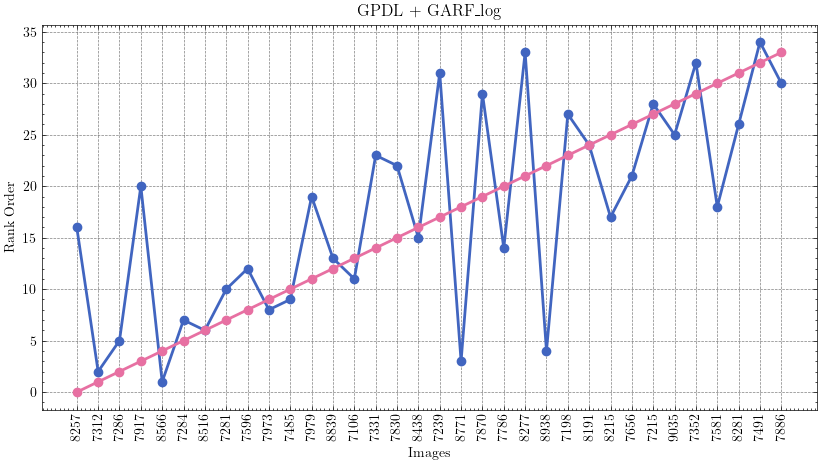

In [506]:
evaluate_design(test_df_a)

{'PLCC': PearsonRResult(statistic=np.float64(0.5717235933041854), pvalue=np.float64(0.001195402737372797)),
 'SRCC': SignificanceResult(statistic=np.float64(0.42561576354679787), pvalue=np.float64(0.021341286444731804)),
 'KRCC': SignificanceResult(statistic=np.float64(0.3152709359605911), pvalue=np.float64(0.016235008804067922)),
 'NDCG': np.float64(0.9691760610803426)}

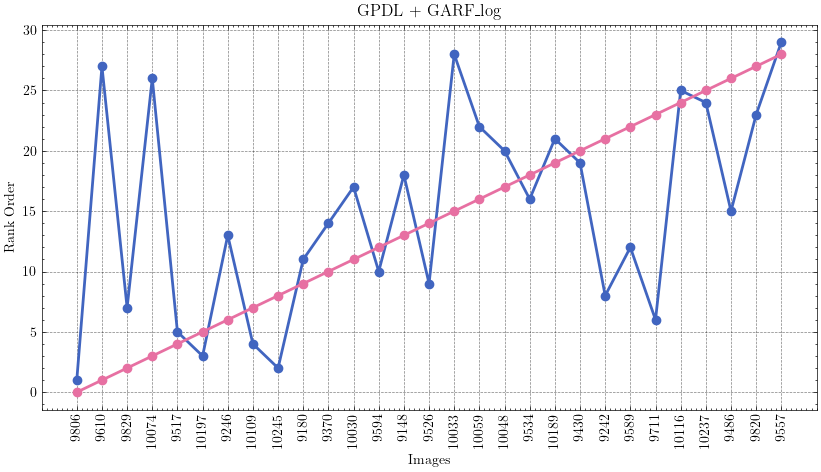

In [508]:
evaluate_design(test_df_b)

In [537]:
feat_pool

{'total_wirelength': 'The total length of all routed wires in the design, which is a key indicator of routing complexity and congestion.',
 'number_vias': 'The total number of vias in the layout, which represent connections between different metal layers.',
 'number_of_multi_cut_vias': 'The number of vias that use multiple cuts for enhanced reliability and lower resistance.',
 'number_of_single_cut_vias': 'The number of vias that use a single cut, which are more susceptible to manufacturing defects but occupy less space.',
 'max_overcon': 'The maximum congestion value observed in any global routing cell, indicating the worst-case routing bottleneck.',
 'total_overcon': 'The sum of all routing congestion values across the entire layout, representing overall congestion severity.',
 'worst_layer_gcell_overcon_rate': 'The highest over-congestion rate observed in any layer for a global routing cell, indicating the most problematic metal layer in terms of congestion.',
 'hard_to_access_pins_

In [538]:
feat_func_list

[<function __main__.total_wirelength(logging_file_string)>,
 <function __main__.number_vias(logging_file_string)>,
 <function __main__.number_of_multi_cut_vias(logging_file_string)>,
 <function __main__.number_of_single_cut_vias(logging_file_string)>,
 <function __main__.max_overcon(logging_file_string)>,
 <function __main__.total_overcon(logging_file_string)>,
 <function __main__.worst_layer_gcell_overcon_rate(logging_file_string)>,
 <function __main__.hard_to_access_pins_ratio(logging_file_string: str) -> dict>,
 <function __main__.instance_blockages_count(logging_file_string: str) -> dict>,
 <function __main__.early_gr_overflow_percentage(logging_file_string: str) -> dict>,
 <function __main__.horizontal_overflow_percentage(logging_file_string: str) -> dict>,
 <function __main__.congestion_prediction_accuracy(logging_file_string: str) -> dict>,
 <function __main__.initial_placement_efficiency(logging_file_string: str) -> dict>,
 <function __main__.area_based_congestion_density(loggi